## Projeto “Mousinho da Silveira” - Análise do desempenho de estudantes

### Grupo Dados_1_5

Este projeto tem como objetivo analisar o desempenho de estudantes na matéria de **Matemática** e **Português**, focando em como alguns fatores sociais e demográficos podem influenciar suas notas e o número de reprovações. A base de dados utilizada contém informações de alunos das escolas **Mousinho da Silveira** e **Gabriel Pereira**, localizadas na região do Alentejo, em Portugal.

Assim como em vários outros países (por exemplo, França ou Venezuela), uma escala de classificação de 20 pontos é usada, onde 0 é a nota mais baixa e 20 é a nota perfeita. Durante o ano letivo, os alunos são avaliados em três períodos, e a última avaliação (nota3) corresponde à nota final.

Este estudo irá considerar dados coletados durante o período de 2005–2006, referentes a duas escolas públicas.

Para esta análise, observamos inicialmente que os dados apresentam valores que parecem destoar dos demais nas notas (**nota1**, **nota2** e **nota3**). Para garantir a qualidade da nossa análise, iremos trabalhar com o ajuste desses valores através da aplicação de filtros nos dados.

As principais colunas que utilizaremos para responder às nossas perguntas de pesquisa são:

*   **Notas:** **nota1**, **nota2**, **nota3** (Notas dos três períodos)
*   **Reprovações:** **estudante_nr_reprovacoes** (Número de reprovações anteriores)
*   **Status dos Pais:** **estudante_status_pais** (Pais Casados, Pais Divorciados)
*   **Acesso à Internet:** **estudante_acesso_internet** ('yes' ou 'no')
*   **Tamanho da Família:** **estudante_tamanho_familia** (maior_que_3_pessoas, menor_que_3_pessoas)
*   **Sexo:** **estudante_sexo** ('F' para feminino, 'M' para masculino)

*   **Relacionamento amoroso: estudante_relacionamento** ('yes' ou 'no')
  



Ao relacionar as notas dos estudantes com estas variáveis, buscamos identificar possíveis padrões e insights sobre os fatores que podem estar associados ao sucesso ou às dificuldades acadêmicas.

Vamos utilizar as bibliotecas Pandas, Matplotlib e Seaborn para análise e visualização dos dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  **Matemática**

A primeira etapa da análise será transformar os dados para que as variáveis fiquem em português, assim como alguns valores categóricos. Isso facilitará a nossa exploração

In [ ]:
df_math = pd.read_csv("/content/drive/MyDrive/Curso O Boticario/data_base_projeto/student-mat.csv", sep=';')  # ou student-por.csv



In [ ]:
df_math_renomeado = df_math.copy()
df_math_renomeado = df_math_renomeado.rename(columns={
                                    'school': 'estudante_escola',
                                    'sex': 'estudante_sexo',
                                    'age': 'estudante_idade',
                                    'address': 'estudante_casa_endereco',
                                    'famsize': 'estudante_tamanho_familia',
                                    'Pstatus': 'estudante_status_pais',
                                    'Medu': 'mae_escolaridade',
                                    'Fedu': 'pai_esciolaridade',
                                    'Mjob': 'mae_trabalho',
                                    'Fjob': 'pai_trabalho',
                                    'reason': 'motivo_escolha_escola',
                                    'guardian': 'responsavel_estudante',
                                    'traveltime': 'tempo_viagem_escola',
                                    'studytime': 'tempo_estudo',
                                    'failures': 'estudante_nr_reprovacoes',
                                    'schoolsup': 'aulas_suplementares',
                                    'famsup': 'apoio_familia',
                                    'paid': 'aulas_pagadas',
                                    'activities': 'atividades',
                                    'nursery': 'creche',
                                    'higher': 'ensino_superior',
                                    'internet': 'estudante_acesso_internet',
                                    'romantic': 'estudante_relacionamento',
                                    'Dalc': 'consumo_alcool_semana',
                                    'Walc': 'consumo_alcool_fim_semana',
                                    'famrel': 'qualidade_relacao_familia',
                                    'freetime': 'estudante_tempo_livre',
                                    'health': 'estudante_qualidade_vida',
                                    "absences": 'estudante_nr_faltas',
                                    'G1': 'nota1',
                                    'G2': 'nota2',
                                    'G3': 'nota3'})

df_math_renomeado.head(5)

,estudante_escola,estudante_sexo,estudante_idade,estudante_casa_endereco,estudante_tamanho_familia,estudante_status_pais,mae_escolaridade,pai_esciolaridade,mae_trabalho,pai_trabalho,...,qualidade_relacao_familia,estudante_tempo_livre,goout,consumo_alcool_semana,consumo_alcool_fim_semana,estudante_qualidade_vida,estudante_nr_faltas,nota1,nota2,nota3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_math_renomeado['estudante_tamanho_familia'] = (
    df_math_renomeado['estudante_tamanho_familia'].replace({
            'GT3': 'maior_que_3_pessoas',
            'LE3': 'menor_que_3_pessoas'
}))

df_math_renomeado['estudante_status_pais'] = (
    df_math_renomeado['estudante_status_pais'].replace({
        'T': 'pais_casados',
        'A': 'pais_divorciados'
        }))

df_math_renomeado['mae_trabalho'] = (
    df_math_renomeado['mae_trabalho'].replace({
        'at_home': 'nao_trabalha',
        'health': 'trabalha_saude',
        'other': 'trabalha_outro',
        'services': 'servicos_adm',
        'teacher': 'professor'
        }))

df_math_renomeado['pai_trabalho'] = (
    df_math_renomeado['pai_trabalho'].replace({
        'at_home': 'nao_trabalha',
        'health': 'trabalha_saude',
        'other': 'trabalha_outro',
        'services': 'servicos_adm',
        'teacher': 'professor'
        }))
df_math_renomeado['motivo_escolha_escola'] = (
    df_math_renomeado['motivo_escolha_escola'].replace({
        'home': 'casa',
        'reputation': 'reputacao',
        'course': 'curso',
        'other': 'outro'
        }))

df_math_renomeado['responsavel_estudante'] = (
    df_math_renomeado['responsavel_estudante'].replace({
        'mother': 'mae',
        'father': 'pai',
        'other': 'outro'
        }))

df_math_renomeado['estudante_casa_endereco'] = (
    df_math_renomeado['estudante_casa_endereco'].replace({
        'R': 'rural',
        'U': 'urbana'
        }))

In [ ]:
df_math_renomeado

,estudante_escola,estudante_sexo,estudante_idade,estudante_casa_endereco,estudante_tamanho_familia,estudante_status_pais,mae_escolaridade,pai_esciolaridade,mae_trabalho,pai_trabalho,...,qualidade_relacao_familia,estudante_tempo_livre,goout,consumo_alcool_semana,consumo_alcool_fim_semana,estudante_qualidade_vida,estudante_nr_faltas,nota1,nota2,nota3
0,GP,F,18,urbana,maior_que_3_pessoas,pais_divorciados,4,4,nao_trabalha,professor,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,urbana,maior_que_3_pessoas,pais_casados,1,1,nao_trabalha,trabalha_outro,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,urbana,menor_que_3_pessoas,pais_casados,1,1,nao_trabalha,trabalha_outro,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,urbana,maior_que_3_pessoas,pais_casados,4,2,trabalha_saude,servicos_adm,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,urbana,maior_que_3_pessoas,pais_casados,3,3,trabalha_outro,trabalha_outro,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,urbana,menor_que_3_pessoas,pais_divorciados,2,2,servicos_adm,servicos_adm,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,urbana,menor_que_3_pessoas,pais_casados,3,1,servicos_adm,servicos_adm,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,rural,maior_que_3_pessoas,pais_casados,1,1,trabalha_outro,trabalha_outro,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,rural,menor_que_3_pessoas,pais_casados,3,2,servicos_adm,trabalha_outro,...,4,4,1,3,4,5,0,11,12,10


### Ajuste no nome das colunas e variáveis categóricas

Nesta etapa, o DataFrame original `df_math` foi copiado para `df_math_renomeado` e diversas transformações foram aplicadas para facilitar a análise e a interpretação dos dados, traduzindo os nomes das colunas e os valores de algumas variáveis categóricas para o português.

As transformações realizadas incluem:

1.  **Renomear Colunas:** As colunas do DataFrame foram renomeadas para termos em português que refletem o conteúdo de cada variável (ver célula de código com `df_math_renomeado = df_math.copy()`). Por exemplo:
    *   `school` foi renomeada para `estudante_escola`
    *   `sex` foi renomeada para `estudante_sexo`
    *   `age` foi renomeada para `estudante_idade`
    *   `famsize` foi renomeada para `estudante_tamanho_familia`
    *   `Pstatus` foi renomeada para `estudante_status_pais`
    *   `internet` foi renomeada para `estudante_acesso_internet`
    *   `failures` foi renomeada para `estudante_nr_reprovacoes`
    *   `G1`, `G2`, `G3` foram renomeadas para `nota1`, `nota2`, `nota3`

2.  **Substituir Valores Categóricos:** Os valores em algumas colunas categóricas foram substituídos por termos em português para maior clareza (ver célula de código onde os `.replace()` são aplicados). Exemplos:
    *   Na coluna `estudante_tamanho_familia`, 'GT3' foi substituído por 'maior_que_3_pessoas' e 'LE3' por 'menor_que_3_pessoas'.
    *   Na coluna `estudante_status_pais`, 'T' foi substituído por 'pais_casados' e 'A' por 'pais_divorciados'.
    *   Os valores nas colunas `mae_trabalho` e `pai_trabalho` também foram traduzidos.
    *   Os valores nas colunas `motivo_escolha_escola`, `responsavel_estudante` e `estudante_casa_endereco` foram traduzidos.

Essas transformações visam padronizar e traduzir os dados, tornando-os mais compreensíveis e prontos para as análises subsequentes focadas no desempenho dos estudantes.

## Análise Exploratória - Quantidade e distribuição de registros

In [ ]:
num_students = len(df_math_renomeado)
print(f"O número de alunos nesta base de dados é: {num_students}")

O número de alunos nesta base de dados é: 395


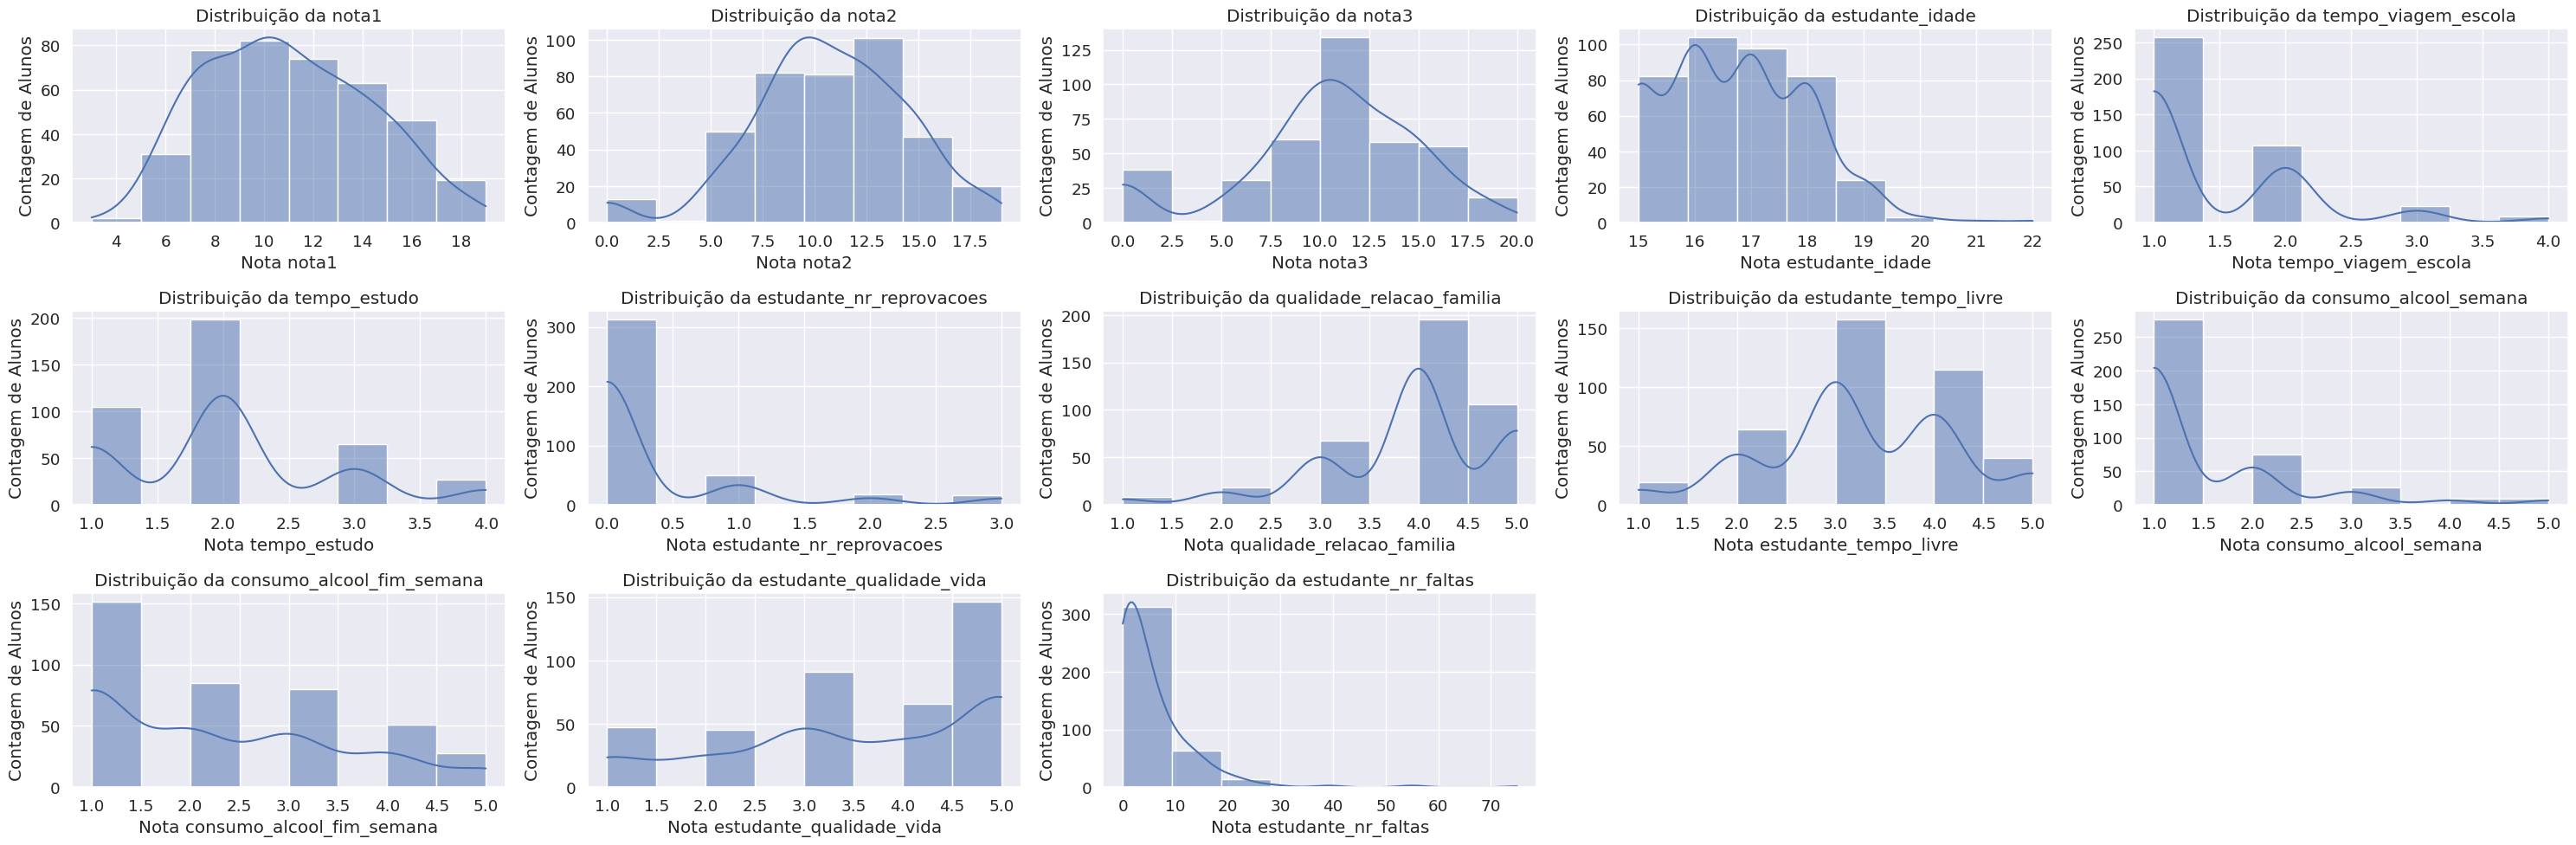

In [ ]:
variaveis_numericas = ['nota1', 'nota2', 'nota3', 'estudante_idade', 'tempo_viagem_escola', 'tempo_estudo', 'estudante_nr_reprovacoes', 'qualidade_relacao_familia', 'estudante_tempo_livre', 'consumo_alcool_semana', 'consumo_alcool_fim_semana', 'estudante_qualidade_vida', 'estudante_nr_faltas']
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_palette("husl")
sns.set(font_scale=1.2)

plt.figure(figsize=(30, 10))  # Cria uma única figura grande o suficiente

for i, variavel in enumerate(variaveis_numericas, 1):
    plt.subplot(3, 5, i)  # 1 linha, 5 colunas, posição i
    sns.histplot(df_math_renomeado[variavel], bins=8, kde=True)
    plt.title(f'Distribuição da {variavel}')
    plt.xlabel(f'Nota {variavel}')
    plt.ylabel('Contagem de Alunos')

plt.tight_layout()
plt.show()

## Análise da Distribuição das Variáveis Numéricas

Após a análise exploratória inicial, foram observados os valores mínimo e máximo para diversas variáveis numéricas relevantes na base de dados:

*   **Notas (nota1, nota2, nota3):** Os valores das notas variam de 0 a 20. O valor mínimo para nota1, nota2 e nota3 é 0, e o valor máximo é 20.
*   **Idade (estudante_idade):** A idade dos alunos na base de dados varia de 15 a 22 anos. O valor mínimo é 15 e o valor máximo é 22.
*   **Tempo de viagem para a escola (tempo_viagem_escola):** O tempo de viagem para a escola varia de 1 a 4. O valor mínimo é 1 e o valor máximo é 4, representando diferentes categorias de tempo.
*   **Tempo de estudo (tempo_estudo):** O tempo de estudo varia de 1 a 4. O valor mínimo é 1 e o valor máximo é 4, indicando diferentes níveis de tempo dedicado ao estudo.
*   **Número de reprovações anteriores (estudante_nr_reprovacoes):** O número de reprovações anteriores varia de 0 a 3. O valor mínimo é 0 e o valor máximo é 3.
*   **Qualidade da relação familiar (qualidade_relacao_familia):** A qualidade da relação familiar varia de 1 a 5. O valor mínimo é 1 e o valor máximo é 5.
*   **Tempo livre do estudante (estudante_tempo_livre):** O tempo livre do estudante varia de 1 a 5. O valor mínimo é 1 e o valor máximo é 5.
*   **Consumo de álcool durante a semana (consumo_alcool_semana):** O consumo de álcool durante a semana varia de 1 a 5. O valor mínimo é 1 e o valor máximo é 5.
*   **Consumo de álcool durante o fim de semana (consumo_alcool_fim_de_semana):** O consumo de álcool durante o fim de semana varia de 1 a 5. O valor mínimo é 1 e o valor máximo é 5.
*   **Qualidade de vida do estudante (estudante_qualidade_vida):** A qualidade de vida do estudante varia de 1 a 5. O valor mínimo é 1 e o valor máximo é 5.
*   **Número de faltas (estudante_nr_faltas):** O número de faltas varia de 0 a 70. O valor mínimo é 0 e o valor máximo é 70.

## Distribuição de Estudantes por Genêro

A análise da distribuição por sexo mostra que há mais alunas (208) do que alunos (187) na base de dados.

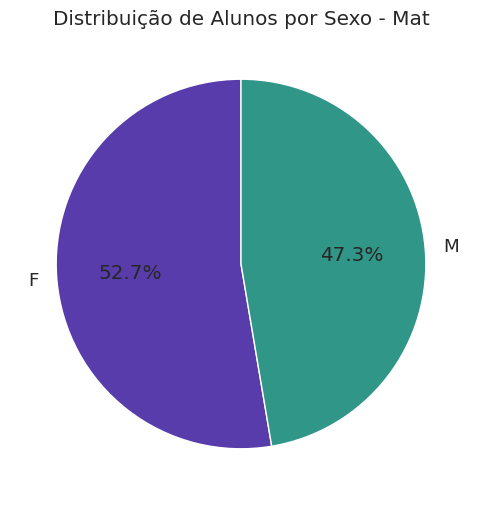

In [ ]:
sexo_counts = df_math_renomeado['estudante_sexo'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    sexo_counts,
    labels=sexo_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#593cab', '#309687']
)
plt.title('Distribuição de Alunos por Sexo - Mat')
plt.show()

## Análise das Notas via Boxplots

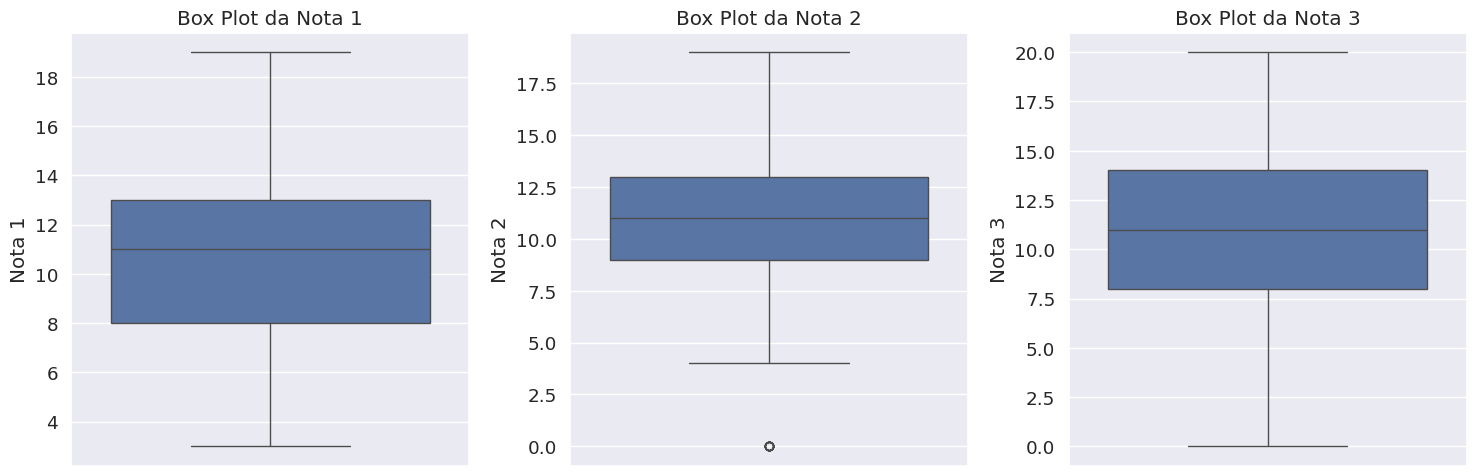

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_math_renomeado, y='nota1')
plt.title('Box Plot da Nota 1')
plt.ylabel('Nota 1')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_math_renomeado, y='nota2')
plt.title('Box Plot da Nota 2')
plt.ylabel('Nota 2')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_math_renomeado, y='nota3')
plt.title('Box Plot da Nota 3')
plt.ylabel('Nota 3')

plt.tight_layout()
plt.show()

**Análise Breve dos Box Plots das Notas (G1, G2, G3)**

Os três Box Plots acima ilustram a distribuição das notas de três períodos (G1, G2 e G3).

**Mediana Consistente:** A linha central em cada caixa (mediana) está consistentemente em torno de 11 para todas as notas. Isso sugere que o desempenho típico dos alunos se mantém estável ao longo dos períodos.

**Concentração das Notas:** A maioria dos alunos (50% centrais) obteve notas concentradas em uma faixa similar para G1 (aproximadamente 8 a 13), G2 (aproximadamente 9 a 13) e G3 (aproximadamente 8 a 14).

**Amplitude e Outliers:** As notas abrangem a faixa completa de 0 a 20. Nota-se um outlier (ponto atípico) na nota G2, próximo a 0, indicando um desempenho excepcionalmente baixo para um aluno nesse período. As notas G1 e G3 não apresentam outliers visíveis, mas a distribuição de G3 se estende de 0 a 20, indicando uma maior dispersão para as notas finais.

## Análise Descritiva da Base de Dados

#### O status civil dos pais (casados ou separados) influencia na media das notas dos alunos ou na quantidade de reprovações?
Para investigar isso, podemos agrupar os dados pelo status dos pais ('estudante_status_pais') e calcular a média das notas (nota1, nota2, nota3) e da soma do número de reprovações ('estudante_nr_reprovacoes') para cada grupo.

#### Média das Notas por Status dos Pais

Analisando a média das notas (considerando a Nota 1, Nota 2 e Nota 3) por status dos pais, o gráfico de barras mostra que:

*   Alunos com **Pais Casados** apresentaram uma média de notas de aproximadamente 10.6.
*   Alunos com **Pais Divorciados** apresentaram uma média de notas de aproximadamente 11.1.

A diferença na média das notas entre os dois grupos é pequena. Isso sugere que, neste conjunto de dados, o status civil dos pais (casados ou divorciados) não parece ser um fator determinante para a média geral das notas dos alunos. Outros fatores podem ter uma influência maior no desempenho acadêmico.

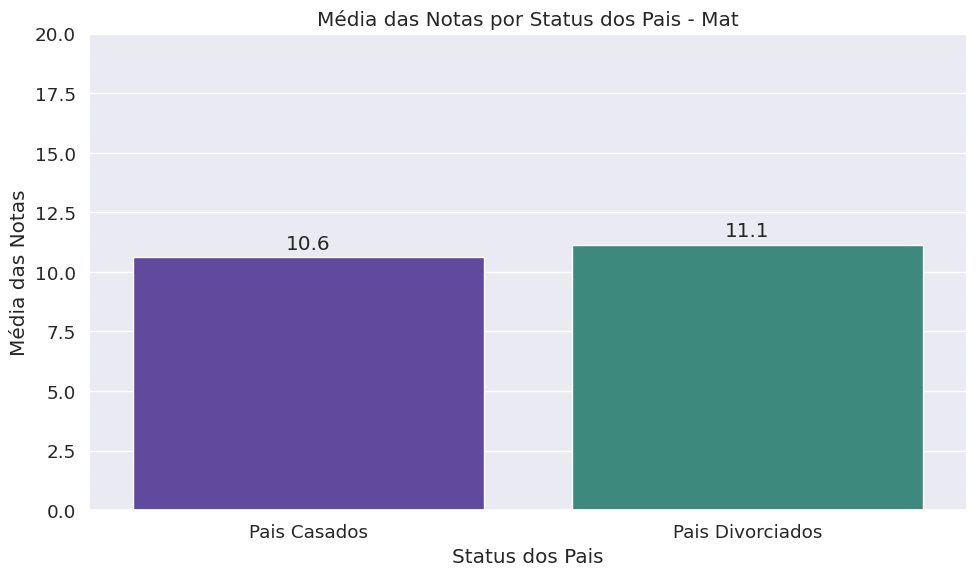

In [ ]:
# Calcula a média das três notas
df_math_renomeado['media_notas'] = df_math_renomeado[['nota1', 'nota2', 'nota3']].mean(axis=1)

# Agrupa por status dos pais e calcula a média das médias das notas
df_pstatus_analysis = df_math_renomeado.groupby('estudante_status_pais')['media_notas'].mean().reset_index()

# Renomeia valores para facilitar a leitura no gráfico
df_pstatus_analysis['estudante_status_pais'] = df_pstatus_analysis['estudante_status_pais'].replace({
    'pais_casados': 'Pais Casados',
    'pais_divorciados': 'Pais Divorciados'
})

# Define as cores personalizadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_pstatus_analysis,
    x='estudante_status_pais',
    y='media_notas',
    hue='estudante_status_pais',
    palette=cores
)

# Adiciona rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Média das Notas por Status dos Pais - Mat')
plt.ylim(0, 20)
plt.xlabel('Status dos Pais')
plt.ylabel('Média das Notas')

plt.tight_layout()
plt.show()

### Análise da Média Entre as Reprovações e Status dos Pais

Ao analisar o número médio de reprovações anteriores, observamos que os alunos com pais divorciados tiveram uma média de 0.34 reprovações, enquanto os alunos com pais casados tiveram uma média muito similar de 0.33 reprovações. Esta pequena diferença sugere que o status civil dos pais, por si só, não parece ter um impacto significativo no histórico de reprovações dos alunos neste conjunto de dados.

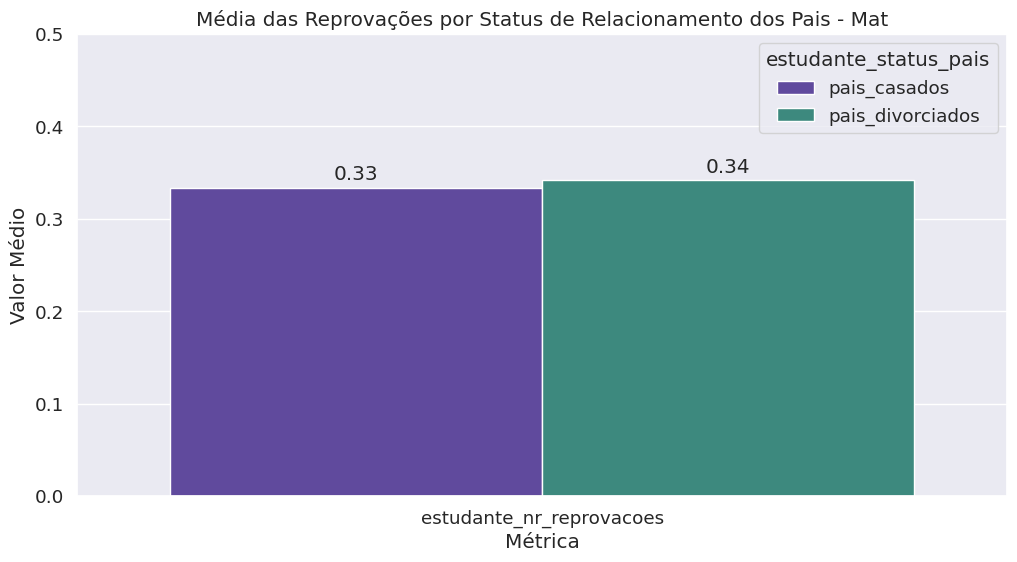

In [ ]:
# Calcula os valores médios para plotagem
internet_means = df_math_renomeado.groupby('estudante_status_pais')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derrete o DataFrame para facilitar a plotagem com seaborn
internet_means_melted = internet_means.melt('estudante_status_pais', var_name='Metric', value_name='Mean Value')
# Define cores personalizadas
cores = ['#593cab', '#309687']


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Metric', y='Mean Value', hue='estudante_status_pais', data=internet_means_melted, palette=cores)
plt.title('Média das Reprovações por Status de Relacionamento dos Pais - Mat')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.5)
# Adiciona rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.show()

### O acesso à internet influencia na media das notas dos alunos ou na quantidade de reprovações?

#### Estudantes com acesso a internet tiveram uma média maior

Os dados mostram uma diferença interessante nas notas médias dos alunos quando consideramos o acesso à internet em casa.

**Estudantes com acesso à internet** apresentaram uma **média de 10,8 pontos.**

Já os que **não têm acesso à internet** ficaram com uma **média de 9,8 pontos.**

Essa diferença de 1 ponto pode parecer pequena, mas pode indicar que o acesso à internet está ajudando esses alunos a terem mais recursos de estudo, facilidade para tirar dúvidas, acesso a conteúdos extras e até ferramentas digitais de apoio à aprendizagem.

Ou seja, o acesso à internet pode ser um fator que favorece o desempenho escolar, reforçando a importância da inclusão digital como parte da educação.

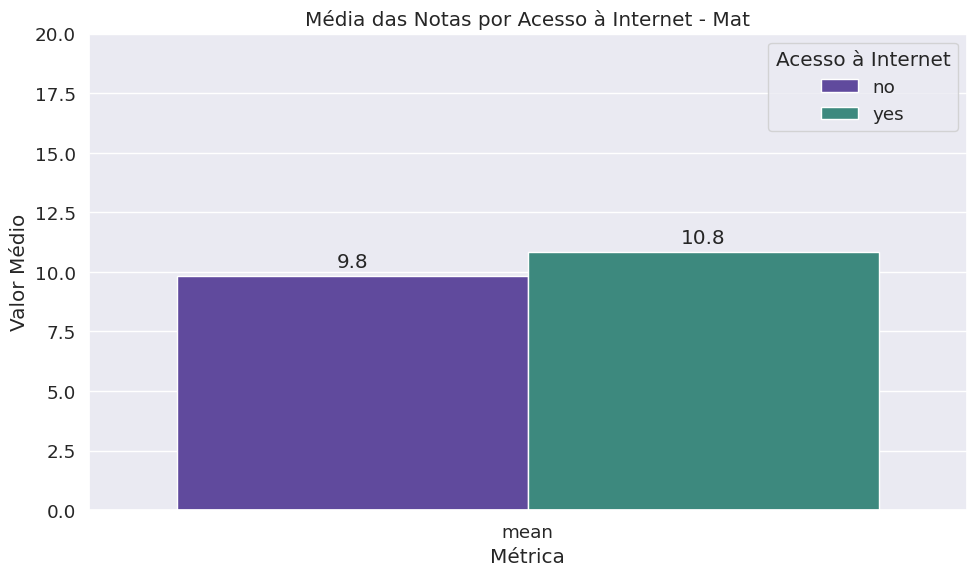

In [ ]:
df_math_renomeado['media_n1_n2_n3'] = (
    df_math_renomeado['nota1'] + df_math_renomeado['nota2'] + df_math_renomeado['nota3']
) / 3

df_estudante_acesso_internet = df_math_renomeado.groupby('estudante_acesso_internet')['media_n1_n2_n3'].agg(['mean'])

# Derretendo para formato longo
df_estudante_acesso_internet_melted = df_estudante_acesso_internet.reset_index().melt(
    id_vars='estudante_acesso_internet',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Define cores personalizadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_acesso_internet_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_acesso_internet',
    palette=cores
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Média das Notas por Acesso à Internet - Mat')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título personalizado
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Acesso à Internet', loc='upper right')

plt.tight_layout()
plt.show()

#### Média de Reprovações por Acesso a Internet

Ao analisarmos a média de reprovações entre os estudantes, observamos uma diferença que pode estar relacionada ao acesso à internet:

Alunos com acesso à internet apresentam uma média de 0,3 reprovações.

Já os que não têm acesso à internet possuem uma média de 0,4 reprovações.

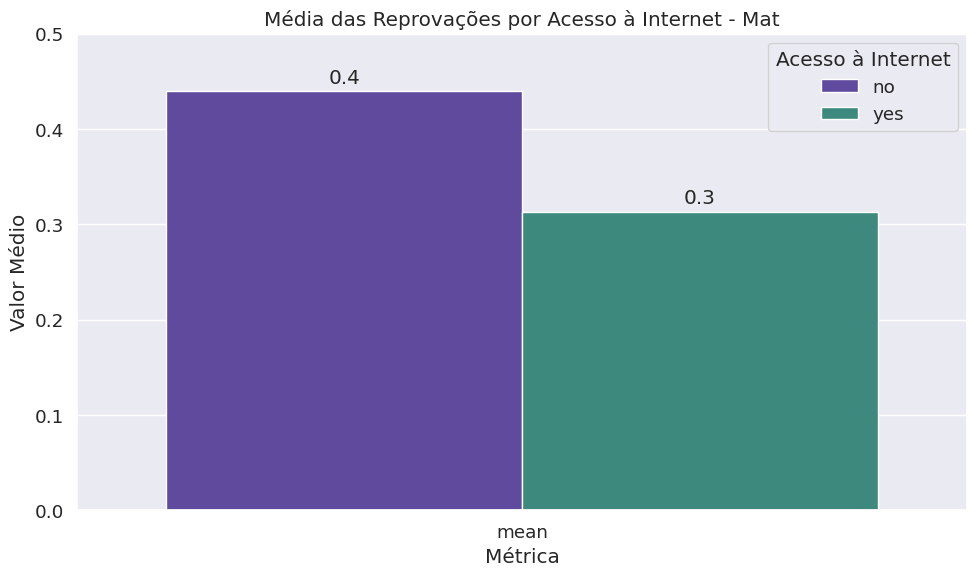

In [ ]:
df_math_renomeado['media_n1_n2_n3'] = (df_math_renomeado['nota1']+df_math_renomeado['nota2']+df_math_renomeado['nota3'])/3

df_estudante_acesso_internet = df_math_renomeado.groupby('estudante_acesso_internet')['estudante_nr_reprovacoes'].agg(['mean'])

# Derretendo para formato longo
df_estudante_acesso_internet_melted = df_estudante_acesso_internet.reset_index().melt(
    id_vars='estudante_acesso_internet',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Define cores personalizadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_acesso_internet_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_acesso_internet',
    palette=cores
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Média das Reprovações por Acesso à Internet - Mat')
plt.ylim(0, 0.5)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título personalizado
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Acesso à Internet', loc='upper right')

plt.tight_layout()
plt.show()

### O tamanho da família influencia na media das notas dos alunos e no número de reprovações?



Ao observarmos a média das notas dos alunos com base no tamanho da família, percebemos uma diferença interessante:

**Estudantes de famílias com até 3 pessoas tiveram uma média de 11,2 pontos.**

**Já os alunos de famílias com mais de 3 pessoas apresentaram uma média de 10,5 pontos.**

Isso pode indicar que alunos de famílias menores talvez tenham mais recursos individuais ou menos distrações em casa, o que pode facilitar o foco nos estudos.

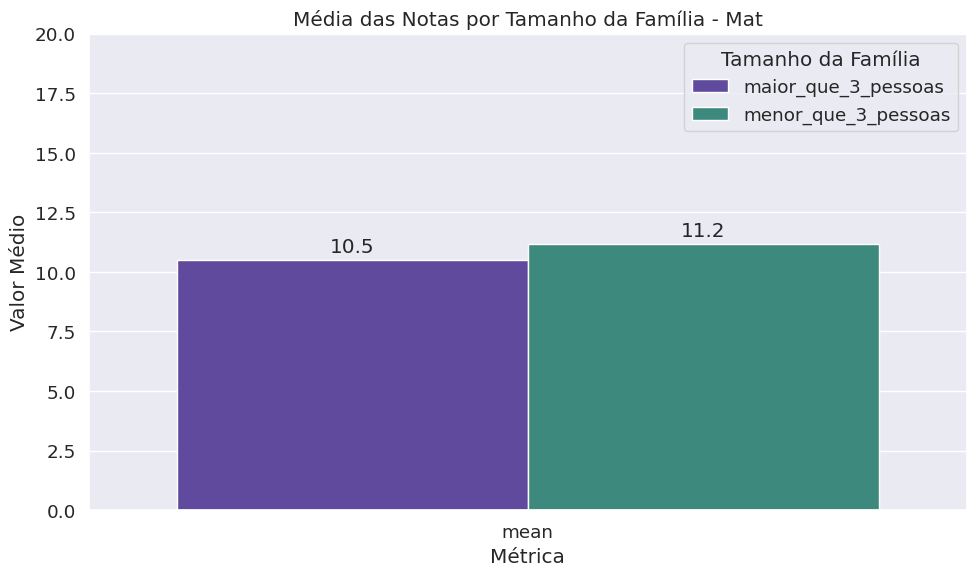

In [ ]:
# Calcula a média das 3 notas
df_math_renomeado['media_n1_n2_n3'] = (
    df_math_renomeado['nota1'] + df_math_renomeado['nota2'] + df_math_renomeado['nota3']
) / 3

# Agrupa por tamanho da família
df_estudante_acesso_internet = df_math_renomeado.groupby('estudante_tamanho_familia')['media_n1_n2_n3'].agg(['mean'])

# Derrete para o formato longo
df_estudante_tamanho_familia_melted = df_estudante_acesso_internet.reset_index().melt(
    id_vars='estudante_tamanho_familia',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Cores personalizadas (pode adicionar mais se quiser variar)
cores = ['#593cab', '#309687']

# Plot do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_tamanho_familia_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_tamanho_familia',
    palette=cores
)

# Adiciona os rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Títulos e rótulos
plt.title('Média das Notas por Tamanho da Família - Mat')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Tamanho da Família', loc='upper right')

plt.tight_layout()
plt.show()

### Análise da média entre Tamanho da Família e Reprovação Escolar
Este gráfico mostra a média de reprovações escolares com base no tamanho da família dos estudantes. Veja o que foi observado:

Alunos que vivem em famílias com mais de 3 pessoas apresentaram uma média de 0,34 reprovações.

Já aqueles que vivem em famílias com até 3 pessoas tiveram uma média um pouco menor, de 0,32 reprovações.

A diferença é pequena, mas pode sugerir que em famílias maiores, o estudante talvez tenha menos atenção individualizada ou mais responsabilidades em casa, o que pode interferir no seu desempenho escolar.

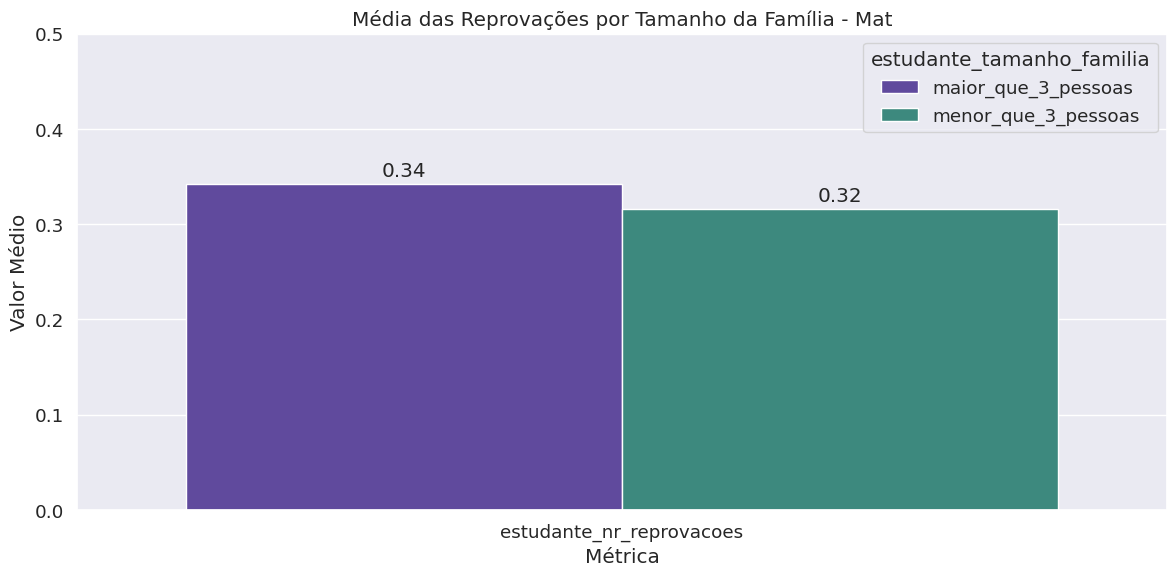

In [ ]:
# Calcula os valores médios para plotagem
famsize_means = df_math_renomeado.groupby('estudante_tamanho_familia')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derrete o DataFrame para facilitar a plotagem com seaborn
famsize_means_melted = famsize_means.melt('estudante_tamanho_familia', var_name='Metric', value_name='Mean Value')

# Define apenas duas cores para as duas categorias
cores_duas = ['#593cab', '#309687']  # roxo e verde

# Cria o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Metric',
    y='Mean Value',
    hue='estudante_tamanho_familia',
    data=famsize_means_melted,
    palette=cores_duas
)

# Títulos e rótulos
plt.title('Média das Reprovações por Tamanho da Família - Mat')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.5)

# Adicionar rótulos às barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

## Existe diferença no desempenho acadêmico (notas) e no histórico de reprovações entre alunos do sexo masculino e feminino?



#### Média geral das notas separadas por sexo dos estudantes:

Alunos do sexo masculino apresentaram uma média de 11,1 pontos.

Já os alunos do sexo feminino obtiveram uma média ligeiramente inferior, de 10,3 pontos.

Embora a diferença não seja muito grande, é possível observar que, nesta base de dados, os meninos tiveram desempenho um pouco melhor que as meninas em termos de notas médias.

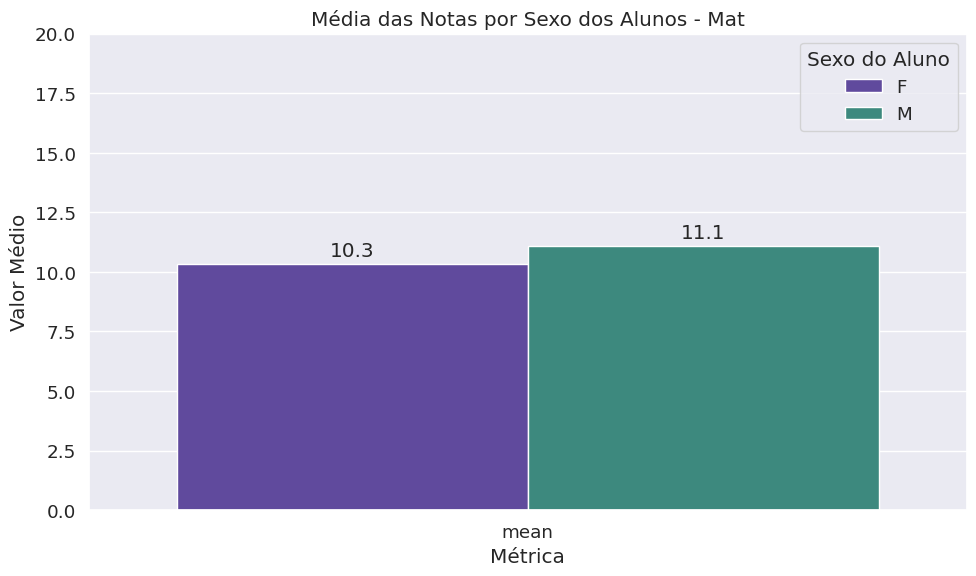

In [ ]:
# Calcula a média das notas
df_math_renomeado['media_n1_n2_n3'] = (df_math_renomeado['nota1'] + df_math_renomeado['nota2'] + df_math_renomeado['nota3']) / 3

# Agrupa por sexo dos estudantes
df_estudante_sexo = df_math_renomeado.groupby('estudante_sexo')['media_n1_n2_n3'].agg(['mean'])

# Converte para formato longo (long format)
df_estudante_sexo_melted = df_estudante_sexo.reset_index().melt(
    id_vars='estudante_sexo',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Define as cores desejadas
cores = ['#593cab', '#309687']  # roxo e verde

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_sexo_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_sexo',
    palette=cores
)

# Adiciona os rótulos com os valores
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Títulos e legendas
plt.title('Média das Notas por Sexo dos Alunos - Mat')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título personalizado
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Sexo do Aluno', loc='upper right')

plt.tight_layout()
plt.show()

#### Média do número de reprovações separadas por sexo:

**Alunas do sexo feminino têm, em média, 0,30 reprovações.**

**Alunos do sexo masculino apresentam uma média de 0,37 reprovações.**

Isso indica que, em geral, os meninos tendem a reprovar mais do que as meninas nesta base de dados.

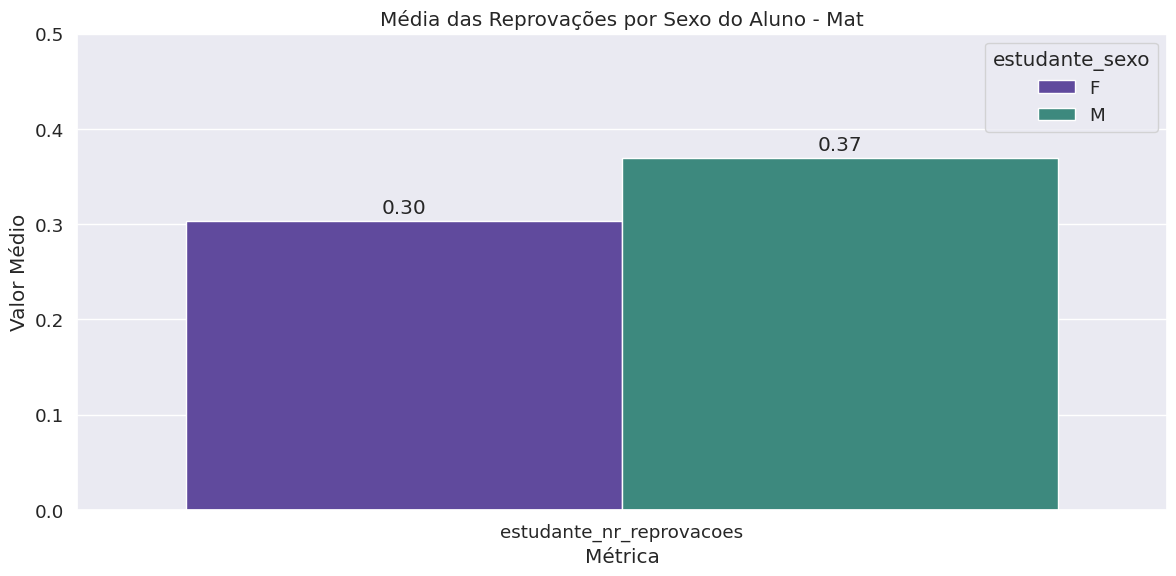

In [ ]:
# Calcula os valores médios para plotagem
famsize_means = df_math_renomeado.groupby('estudante_sexo')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derrete o DataFrame para facilitar a plotagem com seaborn
famsize_means_melted = famsize_means.melt(
    'estudante_sexo',
    var_name='Metric',
    value_name='Mean Value'
)

# Define as cores desejadas: roxo e verde
cores = ['#593cab', '#309687']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Metric',
    y='Mean Value',
    hue='estudante_sexo',
    data=famsize_means_melted,
    palette=cores
)

# Título e eixos
plt.title('Média das Reprovações por Sexo do Aluno - Mat')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.5)

# Adiciona rótulos de valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

### Estar em um relacionamento amoroso afeta negativamente as notas ou aumenta o número de reprovações dos alunos?


### Médias das notas que têm um relacionamento ('yes') e aqueles que não têm ('no')

Os resultados mostram que os alunos sem relacionamento amoroso ("no") obtiveram **uma nota média de 10.95**.

Enquanto os alunos com **relacionamento amoroso ("yes")** obtiveram uma ** nota média de 10.14**.

Isso sugere que, neste conjunto de dados, os alunos sem relacionamento amoroso tiveram um desempenho ligeiramente superior nas notas em comparação com os alunos que estão em um relacionamento.



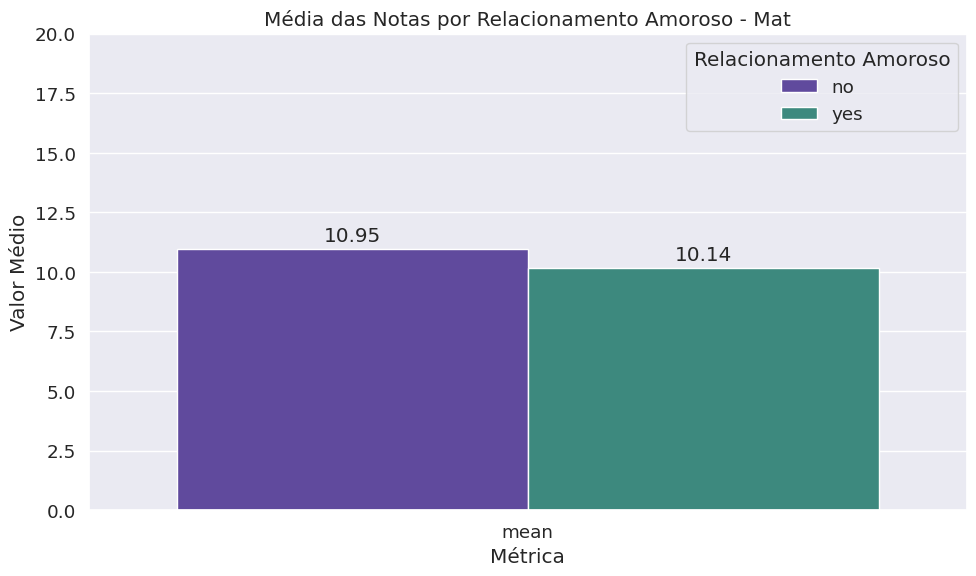

In [ ]:
df_math_renomeado['media_n1_n2_n3'] = (
    df_math_renomeado['nota1'] +
    df_math_renomeado['nota2'] +
    df_math_renomeado['nota3']
) / 3

# Agrupar por relacionamento e calcular a média da nota
df_estudante_relacionamento = df_math_renomeado.groupby('estudante_relacionamento')['media_n1_n2_n3'].agg(['mean'])

# Derreter para o formato longo
df_estudante_relacionamento_melted = df_estudante_relacionamento.reset_index().melt(
    id_vars='estudante_relacionamento',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_relacionamento_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_relacionamento',
    palette=['#593cab', '#309687']  # Cores personalizadas
)

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalização do gráfico
plt.title('Média das Notas por Relacionamento Amoroso - Mat')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Relacionamento Amoroso', loc='upper right')

plt.tight_layout()
plt.show()

### Média de reprovações entre os alunos que têm um relacionamento ('yes') e aqueles que não têm ('no')

O gráfico mostra a média do número de reprovações separadas entre estudantes que estão em um relacionamento amoroso ("yes") e os que não estão ("no"):

**Estudantes que não estão em relacionamento têm uma média de aproximadamente 0,29 reprovações.**

**Estudantes que estão em relacionamento apresentam uma média maior, de aproximadamente 0,43 reprovações.**

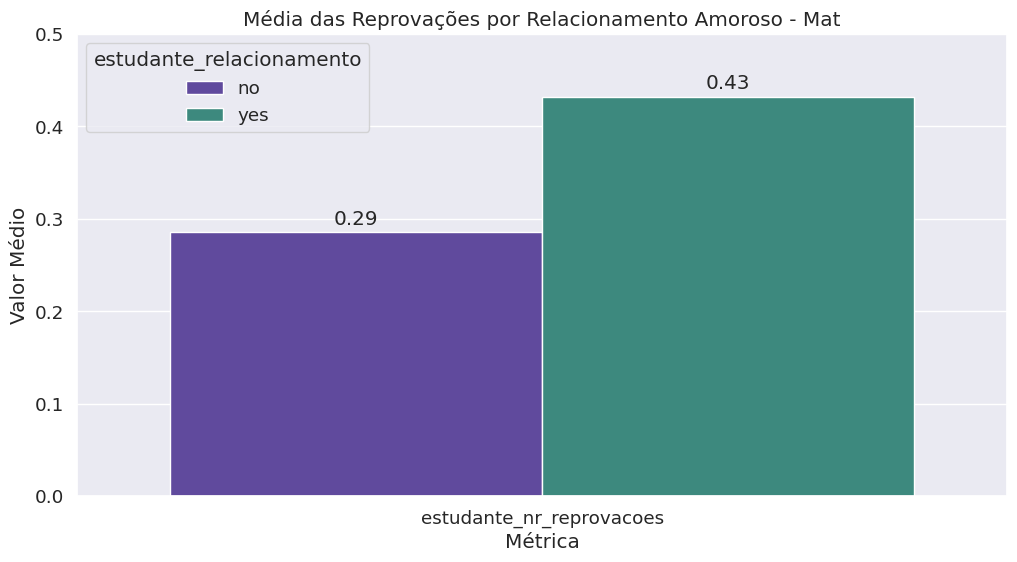

In [ ]:
# Calcula os valores médios para plotagem
famsize_means = df_math_renomeado.groupby('estudante_relacionamento')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derrete o DataFrame para facilitar a plotagem com seaborn
famsize_means_melted = famsize_means.melt('estudante_relacionamento', var_name='Metric', value_name='Mean Value')

# Criar o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Metric',
    y='Mean Value',
    hue='estudante_relacionamento',
    data=famsize_means_melted,
    palette=['#593cab', '#309687']  # Cores personalizadas
)

# Título e eixos
plt.title('Média das Reprovações por Relacionamento Amoroso - Mat')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.5)

# Adicionar rótulos às barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Exibir o gráfico
plt.show()

## Correlacionando Variáveis

### **Visualizando a Relação entre Faltas e Notas:**

Para visualizar a relação entre o número de faltas ('absences') e as notas (G1, G2, G3), vamos criar gráficos de dispersão. Esses gráficos nos ajudarão a identificar visualmente se há alguma tendência, mesmo que não seja uma correlação linear forte.

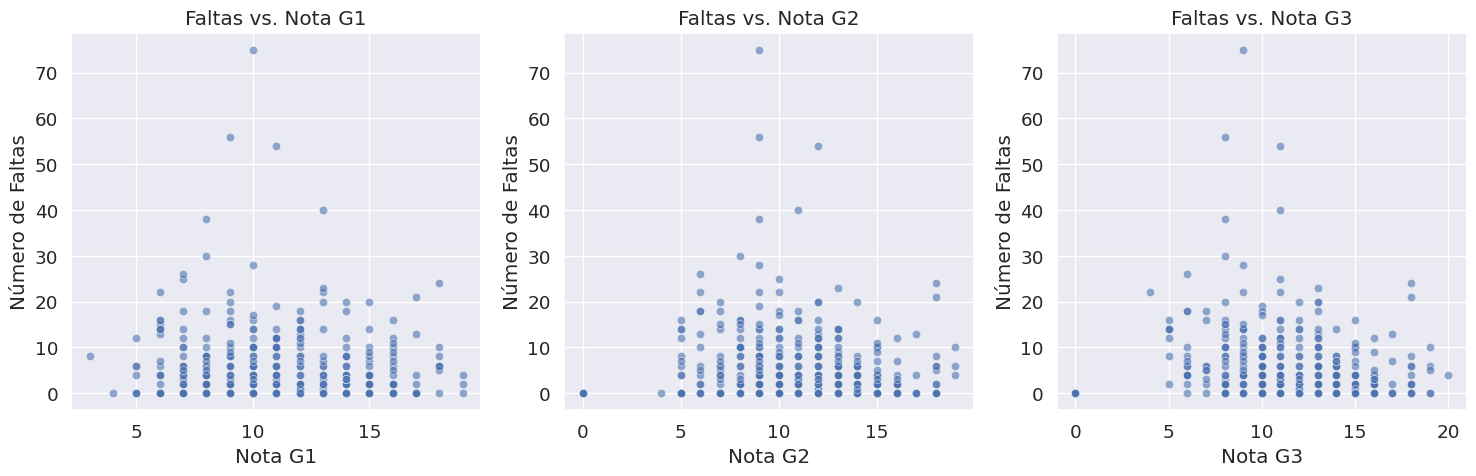

In [ ]:
plt.figure(figsize=(15, 5))

# Gráfico de dispersão para Faltas vs. G1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_math_renomeado, x='nota1', y='estudante_nr_faltas', alpha=0.6)
plt.title('Faltas vs. Nota G1')
plt.ylabel('Número de Faltas')
plt.xlabel('Nota G1')
plt.grid(True)

# Gráfico de dispersão para Faltas vs. G2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_math_renomeado, x='nota2', y='estudante_nr_faltas', alpha=0.6)
plt.title('Faltas vs. Nota G2')
plt.ylabel('Número de Faltas')
plt.xlabel('Nota G2')
plt.grid(True)


# Gráfico de dispersão para Faltas vs. G3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_math_renomeado, x='nota3', y='estudante_nr_faltas', alpha=0.6)
plt.title('Faltas vs. Nota G3')
plt.ylabel('Número de Faltas')
plt.xlabel('Nota G3')
plt.grid(True)


plt.tight_layout()
plt.show()

**Observações dos Gráficos de Dispersão (Faltas vs. Notas):**

Ao analisar os gráficos de dispersão que comparam o número de faltas ('absences') com as notas (G1, G2 e G3), podemos observar o seguinte de forma resumida:

*   **Dispersão dos Pontos:** Os pontos nos gráficos estão bastante dispersos, sem uma linha clara ou curva indicando uma relação forte e consistente entre o número de faltas e as notas.
*   **Concentração de Dados:** A maioria dos alunos tem um número relativamente baixo de faltas (concentrados na parte esquerda dos gráficos). Dentro dessa faixa de poucas faltas, as notas variam bastante.
*   **Faltas Elevadas e Notas:** Embora haja alguns alunos com um número maior de faltas, não vemos uma tendência clara de que as notas diminuam drasticamente à medida que o número de faltas aumenta. Há casos de alunos com muitas faltas e notas variadas, incluindo algumas notas razoáveis.

**Em Resumo:**

Visualmente, os gráficos de dispersão reforçam a conclusão da análise de correlação: não há uma relação linear forte e óbvia entre o número de faltas e as notas dos alunos neste conjunto de dados. Isso sugere que, embora as faltas possam ter algum impacto individual, elas não são o único ou principal fator determinante das notas, e outros elementos podem influenciar o desempenho acadêmico.

### **Visualizando a Relação entre Tempo de Viagem e Notas:**

Para visualizar a relação entre o tempo de viagem para a escola('tempo_viagem_escola') e as notas (G1, G2, G3), vamos criar gráficos de dispersão. Esses gráficos nos ajudarão a identificar visualmente se há alguma tendência, mesmo que não seja uma correlação linear forte.

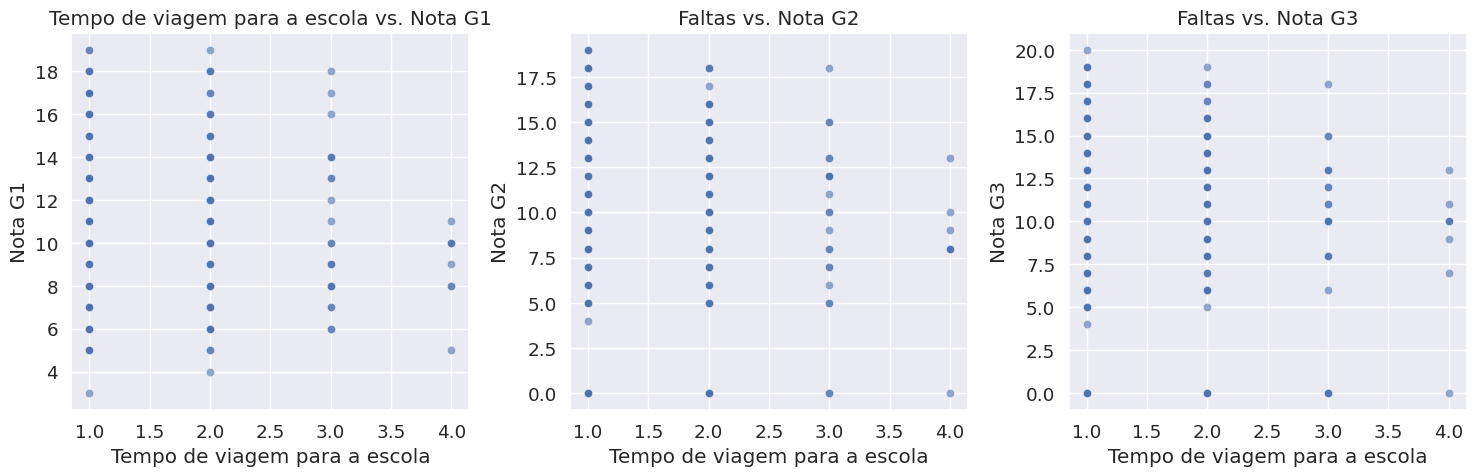

In [ ]:
plt.figure(figsize=(15, 5))

# Gráfico de dispersão para Faltas vs. G1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_math_renomeado, x='tempo_viagem_escola', y='nota1', alpha=0.6)
plt.title('Tempo de viagem para a escola vs. Nota G1')
plt.xlabel('Tempo de viagem para a escola')
plt.ylabel('Nota G1')
plt.grid(True)

# Gráfico de dispersão para Faltas vs. G2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_math_renomeado, x='tempo_viagem_escola', y='nota2', alpha=0.6)
plt.title('Faltas vs. Nota G2')
plt.xlabel('Tempo de viagem para a escola')
plt.ylabel('Nota G2')
plt.grid(True)


# Gráfico de dispersão para Faltas vs. G3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_math_renomeado, x='tempo_viagem_escola', y='nota3', alpha=0.6)
plt.title('Faltas vs. Nota G3')
plt.xlabel('Tempo de viagem para a escola')
plt.ylabel('Nota G3')
plt.grid(True)


plt.tight_layout()
plt.show()


Os gráficos de dispersão comparam o tempo de viagem dos alunos até a escola com suas notas nos três períodos (G1, G2 e G3). Observa-se uma grande dispersão dos pontos em todos os gráficos, o que sugere que não há uma relação linear forte e consistente entre o tempo de viagem dos alunos e as notas.

### **Visualizando a Relação entre Tempo de Estudo e Notas:**

Para visualizar a relação entre o tempo de estudo (´study_time´) e as notas (G1, G2, G3), vamos criar gráficos de dispersão. Esses gráficos nos ajudarão a identificar visualmente se há alguma tendência, mesmo que não seja uma correlação linear forte.

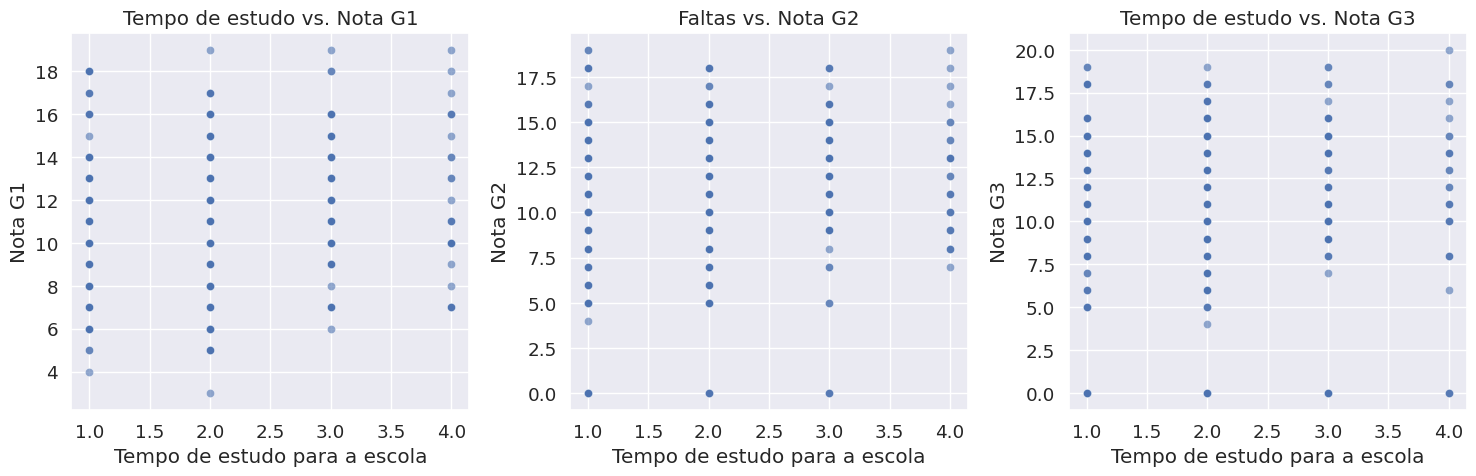

In [ ]:
plt.figure(figsize=(15, 5))

# Gráfico de dispersão para Faltas vs. G1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_math_renomeado, x='tempo_estudo', y='nota1', alpha=0.6)
plt.title('Tempo de estudo vs. Nota G1')
plt.xlabel('Tempo de estudo para a escola')
plt.ylabel('Nota G1')
plt.grid(True)

# Gráfico de dispersão para Faltas vs. G2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_math_renomeado, x='tempo_estudo', y='nota2', alpha=0.6)
plt.title('Faltas vs. Nota G2')
plt.xlabel('Tempo de estudo para a escola')
plt.ylabel('Nota G2')
plt.grid(True)


# Gráfico de dispersão para Faltas vs. G3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_math_renomeado, x='tempo_estudo', y='nota3', alpha=0.6)
plt.title('Tempo de estudo vs. Nota G3')
plt.xlabel('Tempo de estudo para a escola')
plt.ylabel('Nota G3')
plt.grid(True)


plt.tight_layout()
plt.show()

A análise dos gráficos mostra que estudantes que dedicam mais tempo aos estudos tendem a ter melhores desempenhos nas notas G1 e G2. Para a G1, é possível observar uma concentração de notas mais altas entre os alunos com tempo de estudo 3 e 4. O mesmo padrão se repete na G2, onde notas mais baixas aparecem com maior frequência entre os que estudam menos (nível 1). Isso indica que, de forma geral, um maior tempo de estudo está associado a melhores resultados escolares.


#  **Português**

A primeira etapa da análise será transformar os dados para que as variáveis fiquem em português, assim como alguns valores categóricos. Isso facilitará a nossa exploração

In [ ]:
#df_math = pd.read_csv("/content/drive/MyDrive/Curso O Boticario/data_base_projeto/student-mat.csv", sep=';')  # ou student-por.csv
df_port = pd.read_csv("/content/drive/MyDrive/Curso O Boticario/data_base_projeto/student-por.csv", sep=';')  # ou student-por.csv
# df_total = pd.concat([df_math, df_port], ignore_index=True)


In [ ]:
df_port_renomeado = df_port.copy()
df_port_renomeado = df_port_renomeado.rename(columns={
                                    'school': 'estudante_escola',
                                    'sex': 'estudante_sexo',
                                    'age': 'estudante_idade',
                                    'address': 'estudante_casa_endereco',
                                    'famsize': 'estudante_tamanho_familia',
                                    'Pstatus': 'estudante_status_pais',
                                    'Medu': 'mae_escolaridade',
                                    'Fedu': 'pai_esciolaridade',
                                    'Mjob': 'mae_trabalho',
                                    'Fjob': 'pai_trabalho',
                                    'reason': 'motivo_escolha_escola',
                                    'guardian': 'responsavel_estudante',
                                    'traveltime': 'tempo_viagem_escola',
                                    'studytime': 'tempo_estudo',
                                    'failures': 'estudante_nr_reprovacoes',
                                    'schoolsup': 'aulas_suplementares',
                                    'famsup': 'apoio_familia',
                                    'paid': 'aulas_pagadas',
                                    'activities': 'atividades',
                                    'nursery': 'creche',
                                    'higher': 'ensino_superior',
                                    'internet': 'estudante_acesso_internet',
                                    'romantic': 'estudante_relacionamento',
                                    'Dalc': 'consumo_alcool_semana',
                                    'Walc': 'consumo_alcool_fim_semana',
                                    'famrel': 'qualidade_relacao_familia',
                                    'freetime': 'estudante_tempo_livre',
                                    'health': 'estudante_qualidade_vida',
                                    "absences": 'estudante_nr_faltas',
                                    'G1': 'nota1',
                                    'G2': 'nota2',
                                    'G3': 'nota3'})

df_port_renomeado.head(5)

,estudante_escola,estudante_sexo,estudante_idade,estudante_casa_endereco,estudante_tamanho_familia,estudante_status_pais,mae_escolaridade,pai_esciolaridade,mae_trabalho,pai_trabalho,...,qualidade_relacao_familia,estudante_tempo_livre,goout,consumo_alcool_semana,consumo_alcool_fim_semana,estudante_qualidade_vida,estudante_nr_faltas,nota1,nota2,nota3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df_port_renomeado['estudante_tamanho_familia'] = (
    df_port_renomeado['estudante_tamanho_familia'].replace({
            'GT3': 'maior_que_3_pessoas',
            'LE3': 'menor_que_3_pessoas'
}))

df_port_renomeado['estudante_status_pais'] = (
    df_port_renomeado['estudante_status_pais'].replace({
        'T': 'pais_casados',
        'A': 'pais_divorciados'
        }))

df_port_renomeado['mae_trabalho'] = (
    df_port_renomeado['mae_trabalho'].replace({
        'at_home': 'nao_trabalha',
        'health': 'trabalha_saude',
        'other': 'trabalha_outro',
        'services': 'servicos_adm',
        'teacher': 'professor'
        }))

df_port_renomeado['pai_trabalho'] = (
    df_port_renomeado['pai_trabalho'].replace({
        'at_home': 'nao_trabalha',
        'health': 'trabalha_saude',
        'other': 'trabalha_outro',
        'services': 'servicos_adm',
        'teacher': 'professor'
        }))
df_port_renomeado['motivo_escolha_escola'] = (
    df_port_renomeado['motivo_escolha_escola'].replace({
        'home': 'casa',
        'reputation': 'reputacao',
        'course': 'curso',
        'other': 'outro'
        }))

df_port_renomeado['responsavel_estudante'] = (
    df_port_renomeado['responsavel_estudante'].replace({
        'mother': 'mae',
        'father': 'pai',
        'other': 'outro'
        }))

df_port_renomeado['estudante_casa_endereco'] = (
    df_port_renomeado['estudante_casa_endereco'].replace({
        'R': 'rural',
        'U': 'urbana'
        }))

### Ajuste no nome das colunas e variáveis categóricas

Nesta etapa, o DataFrame original `df_port` foi copiado para `df_math_renomeado` e diversas transformações foram aplicadas para facilitar a análise e a interpretação dos dados, traduzindo os nomes das colunas e os valores de algumas variáveis categóricas para o português.

As transformações realizadas incluem:

1.  **Renomear Colunas:** As colunas do DataFrame foram renomeadas para termos em português que refletem o conteúdo de cada variável (ver célula de código com `df_port_renomeado = df_port.copy()`). Por exemplo:
    *   `school` foi renomeada para `estudante_escola`
    *   `sex` foi renomeada para `estudante_sexo`
    *   `age` foi renomeada para `estudante_idade`
    *   `famsize` foi renomeada para `estudante_tamanho_familia`
    *   `Pstatus` foi renomeada para `estudante_status_pais`
    *   `internet` foi renomeada para `estudante_acesso_internet`
    *   `failures` foi renomeada para `estudante_nr_reprovacoes`
    *   `G1`, `G2`, `G3` foram renomeadas para `nota1`, `nota2`, `nota3`

2.  **Substituir Valores Categóricos:** Os valores em algumas colunas categóricas foram substituídos por termos em português para maior clareza (ver célula de código onde os `.replace()` são aplicados). Exemplos:
    *   Na coluna `estudante_tamanho_familia`, 'GT3' foi substituído por 'maior_que_3_pessoas' e 'LE3' por 'menor_que_3_pessoas'.
    *   Na coluna `estudante_status_pais`, 'T' foi substituído por 'pais_casados' e 'A' por 'pais_divorciados'.
    *   Os valores nas colunas `mae_trabalho` e `pai_trabalho` também foram traduzidos.
    *   Os valores nas colunas `motivo_escolha_escola`, `responsavel_estudante` e `estudante_casa_endereco` foram traduzidos.

Essas transformações visam padronizar e traduzir os dados, tornando-os mais compreensíveis e prontos para as análises subsequentes focadas no desempenho dos estudantes.

## Análise Exploratória - Quantidade e distribuição de registros

In [ ]:
num_students = len(df_port_renomeado)
print(f"O número de alunos nesta base de dados é: {num_students}")

O número de alunos nesta base de dados é: 649


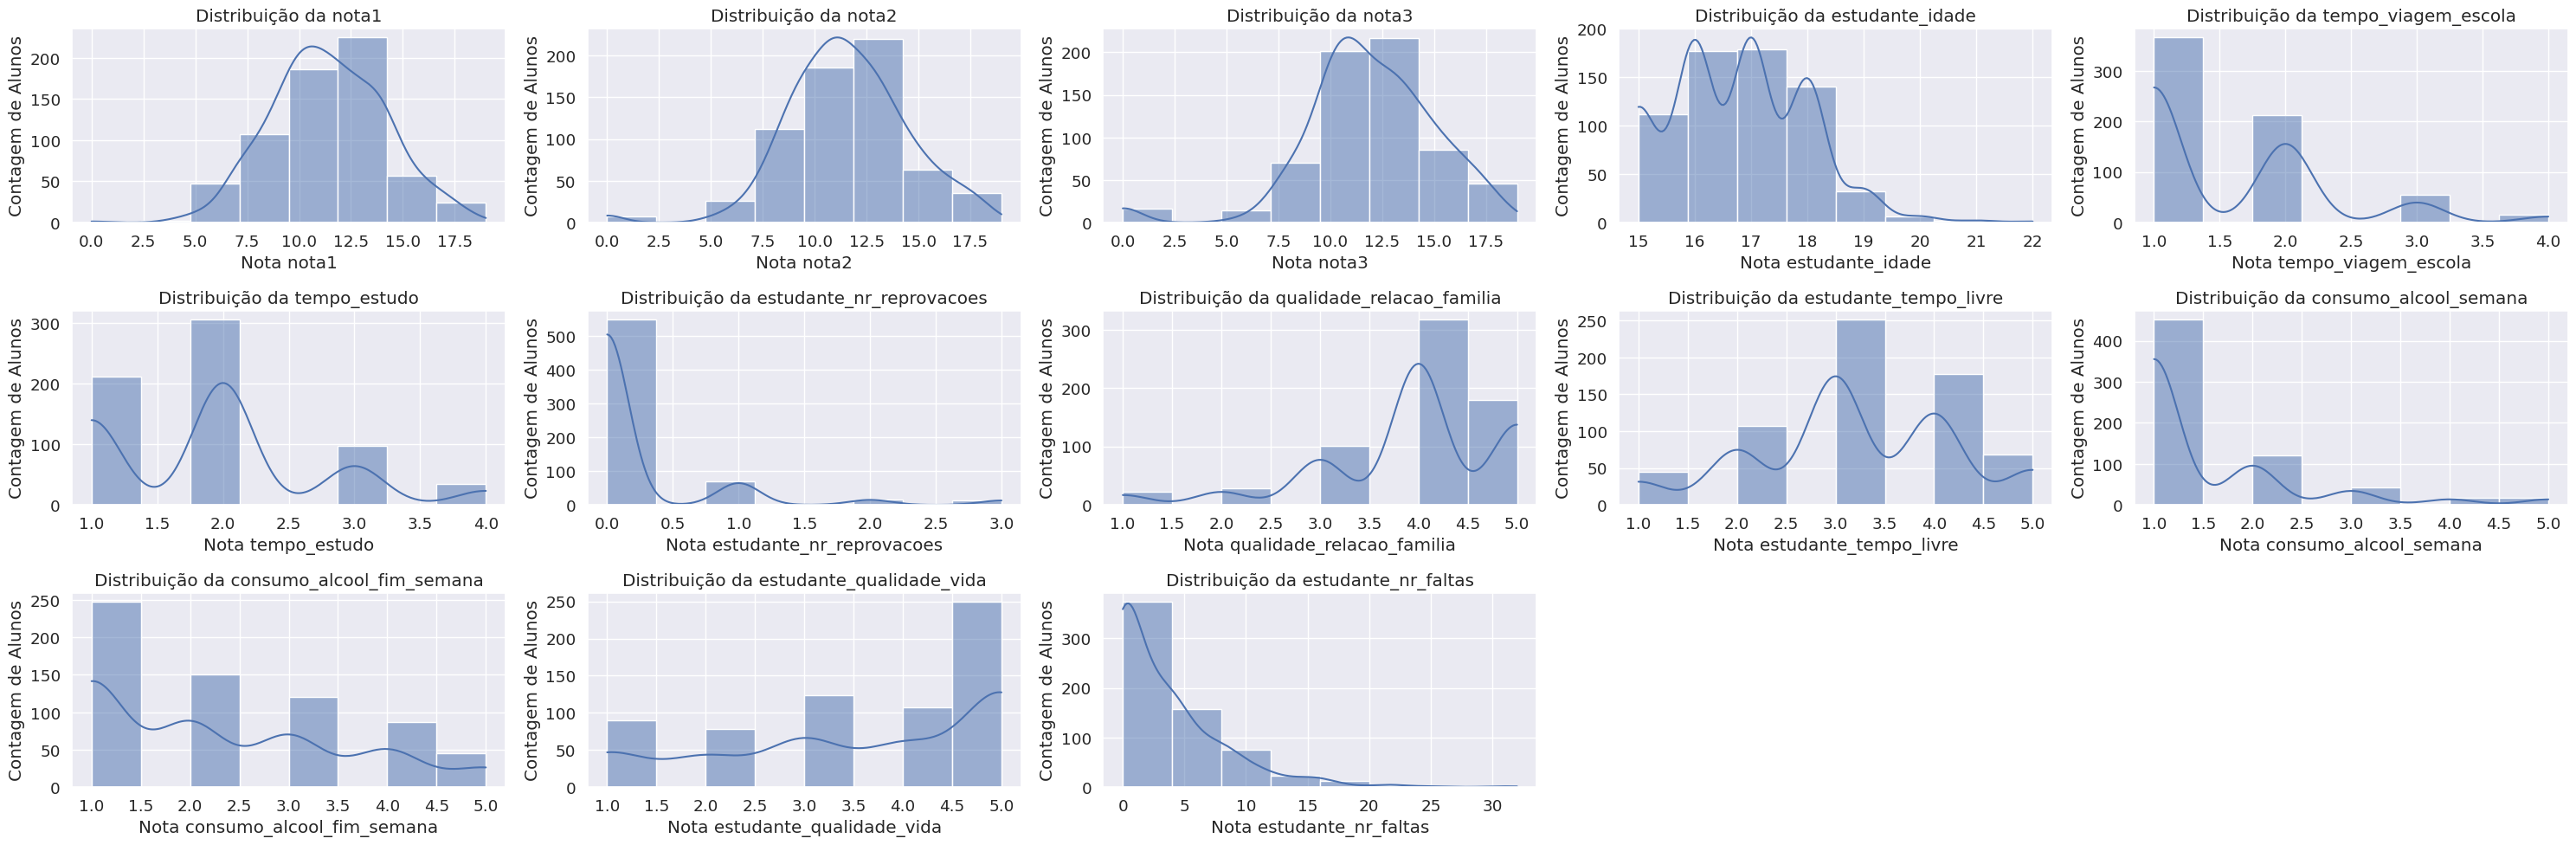

In [ ]:
variaveis_numericas = ['nota1', 'nota2', 'nota3', 'estudante_idade', 'tempo_viagem_escola', 'tempo_estudo', 'estudante_nr_reprovacoes', 'qualidade_relacao_familia', 'estudante_tempo_livre', 'consumo_alcool_semana', 'consumo_alcool_fim_semana', 'estudante_qualidade_vida', 'estudante_nr_faltas']
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_palette("husl")
sns.set(font_scale=1.2)

plt.figure(figsize=(30, 10))  # Cria uma única figura grande o suficiente

for i, variavel in enumerate(variaveis_numericas, 1):
    plt.subplot(3, 5, i)  # 1 linha, 5 colunas, posição i
    sns.histplot(df_port_renomeado[variavel], bins=8, kde=True)
    plt.title(f'Distribuição da {variavel}')
    plt.xlabel(f'Nota {variavel}')
    plt.ylabel('Contagem de Alunos')

plt.tight_layout()
plt.show()

## Análise da Distribuição das Variáveis Numéricas

Após a análise exploratória inicial, foram observados os valores mínimo e máximo para diversas variáveis numéricas relevantes na base de dados, bem como suas distribuições:



*   **Notas (nota1, nota2, nota3):** Variam aproximadamente de 0 a 20, com maior concentração entre 10 e 15 pontos, sugerindo um desempenho médio predominante entre os alunos.
*   **Idade (estudante_idade):** Varia de 15 a 22 anos, com a maioria dos alunos entre 16 e 18 anos.

*   **Tempo de viagem para a escola (tempo_viagem_escola):** Varia de 1 a 4, com clara predominância do valor 1 (viagens curtas), indicando que a maioria dos alunos mora próximo à escola.

*   **Tempo de estudo (tempo_estudo):** Varia de 1 a 4, com maior concentração nos níveis 2 e 1 (menos tempo de estudo), o que pode impactar no desempenho acadêmico.


*  **Número de reprovações (estudante_nr_reprovacoes):** Varia de 0 a 3, sendo o valor 0 o mais comum. A maioria dos alunos nunca foi reprovada.

*   **Qualidade da relação familiar (qualidade_relacao_familia):** Varia de 1 a 5, com concentração maior nos valores 4 e 5, indicando relações familiares consideradas boas pela maioria.

*   **Tempo livre (estudante_tempo_livre):** Varia de 1 a 5, com a maioria concentrada nos valores 3 e 4.
*   Consumo de álcool durante a semana (consumo_alcool_semana): Varia de 1 a 5, com forte predominância do valor 1, indicando baixo consumo de álcool em dias úteis.

*   **Consumo de álcool no fim de semana (consumo_alcool_fim_de_semana):** Varia de 1 a 5, com distribuição mais dispersa, mas ainda com predominância no valor 1.
*   **Qualidade de vida (estudante_qualidade_vida):** Varia de 1 a 5, com grande concentração no valor 5, mostrando que os alunos, em geral, avaliam sua qualidade de vida como alta.


*   **Número de faltas (estudante_nr_faltas):** Varia de 0 a mais de 30, mas a maioria dos alunos apresenta de 0 a 10 faltas, sugerindo boa frequência.


## Distribuição de Estudantes por Genêro

A análise da distribuição por sexo mostra que há mais alunas (383) do que alunos (266) na base de dados.

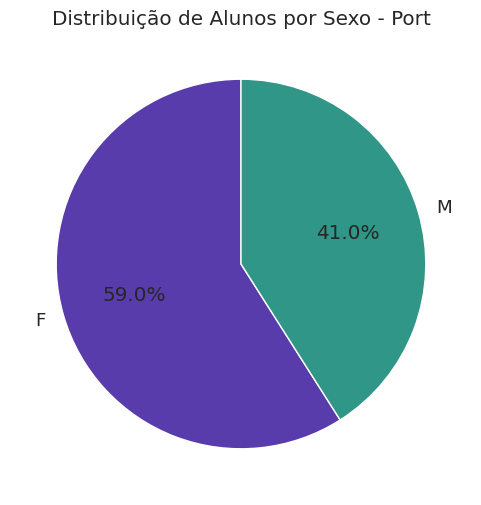

In [ ]:
sexo_counts = df_port_renomeado['estudante_sexo'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    sexo_counts,
    labels=sexo_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#593cab', '#309687']
)
plt.title('Distribuição de Alunos por Sexo - Port')
plt.show()

## Análise das Notas via Boxplots

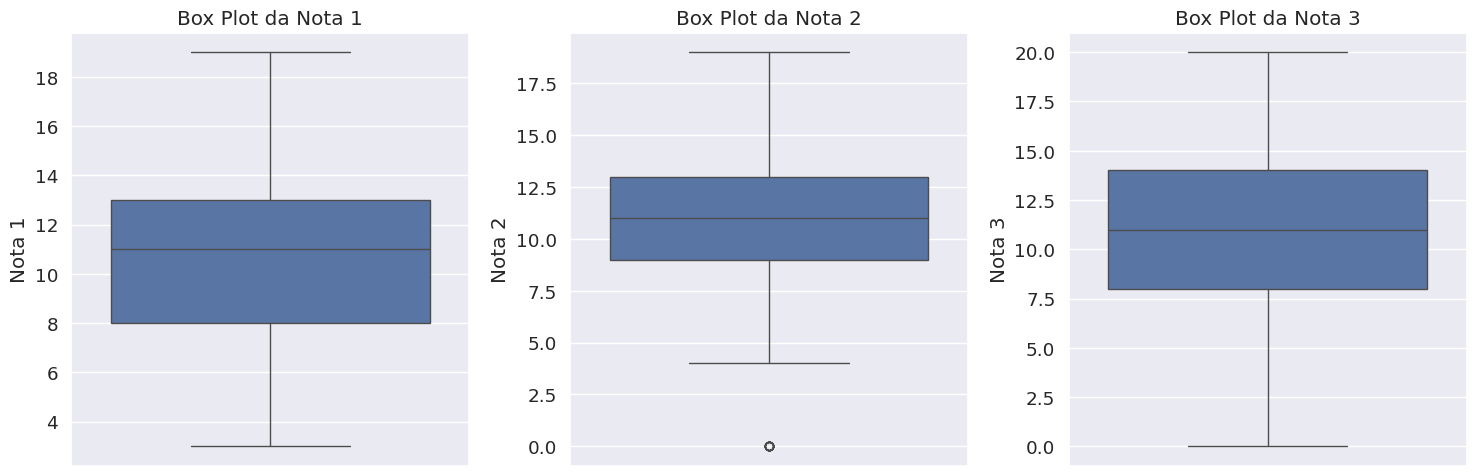

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_math_renomeado, y='nota1')
plt.title('Box Plot da Nota 1')
plt.ylabel('Nota 1')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_math_renomeado, y='nota2')
plt.title('Box Plot da Nota 2')
plt.ylabel('Nota 2')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_math_renomeado, y='nota3')
plt.title('Box Plot da Nota 3')
plt.ylabel('Nota 3')

plt.tight_layout()
plt.show()

**Análise Breve dos Box Plots das Notas (1, 2, 3)**

Os três Box Plots acima ilustram a distribuição das notas das avaliações (Nota 1, Nota 2 e Nota 3).

Mediana Consistente:
A linha central de cada box plot (mediana) está situada em torno de 11, sugerindo que o desempenho típico dos alunos permaneceu estável entre as três avaliações.

Concentração das Notas:
A maior parte dos alunos (50% centrais) obteve notas concentradas nas seguintes faixas:

Nota 1: aproximadamente entre 9 e 13

Nota 2: aproximadamente entre 9 e 13

Nota 3: aproximadamente entre 10 e 14

Amplitude e Outliers:
As notas variam em toda a escala de 0 a 20. Notam-se outliers nas notas 1, 2 e 3, todos próximos de 0, indicando casos de desempenho muito abaixo da média. A distribuição da Nota 3 apresenta maior dispersão, com valores variando de 0 até o limite máximo de 20, evidenciando uma maior variabilidade nas notas finais.

## Análise Descritiva da Base de Dados

#### O status civil dos pais (casados ou separados) influencia na media das notas dos alunos ou na quantidade de reprovações?
Para investigar isso, podemos agrupar os dados pelo status dos pais ('estudante_status_pais') e calcular a média das notas (nota1, nota2, nota3) e da soma do número de reprovações ('estudante_nr_reprovacoes') para cada grupo.

#### Média das Notas por Status dos Pais

Analisando a média das notas (considerando a Nota 1, Nota 2 e Nota 3) por status dos pais, o gráfico de barras mostra que:

*   Alunos com **Pais Casados** apresentaram uma média de notas de aproximadamente 11.2.
*   Alunos com **Pais Divorciados** apresentaram uma média de notas de aproximadamente 11.4.

A diferença na média das notas entre os dois grupos é pequena. Isso sugere que, neste conjunto de dados, o status civil dos pais (casados ou divorciados) não parece ser um fator determinante para a média geral das notas dos alunos. Outros fatores podem ter uma influência maior no desempenho acadêmico.

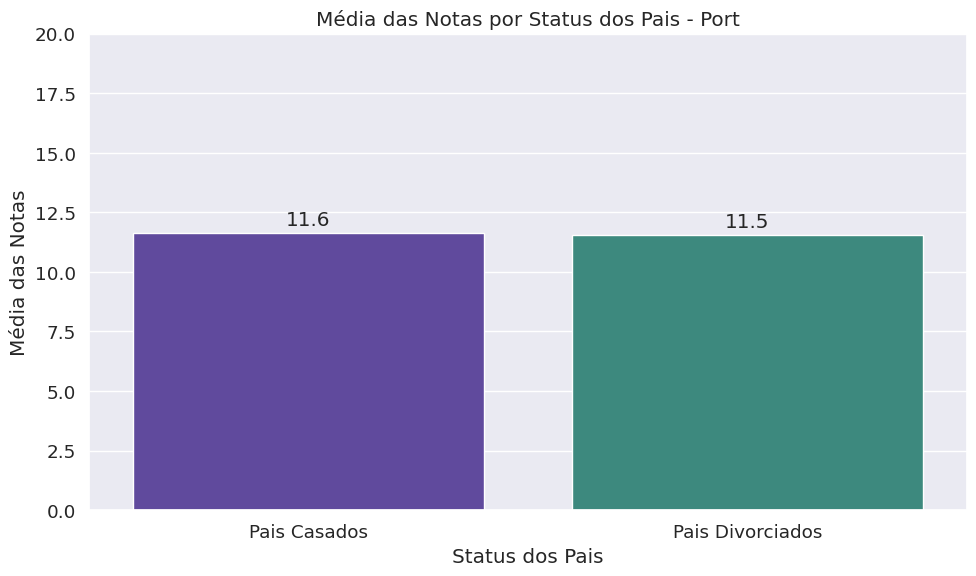

In [ ]:
# Calcula a média das três notas
df_port_renomeado['media_notas'] = df_port_renomeado[['nota1', 'nota2', 'nota3']].mean(axis=1)

# Agrupa por status dos pais e calcula a média das médias das notas
df_pstatus_analysis = df_port_renomeado.groupby('estudante_status_pais')['media_notas'].mean().reset_index()

# Renomeia os valores para facilitar a leitura no gráfico
df_pstatus_analysis['estudante_status_pais'] = df_pstatus_analysis['estudante_status_pais'].replace({
    'pais_casados': 'Pais Casados',
    'pais_divorciados': 'Pais Divorciados'
})

# Definindo cores personalizadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_pstatus_analysis,
    x='estudante_status_pais',
    y='media_notas',
    hue='estudante_status_pais',
    palette=cores
)

# Adiciona rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Média das Notas por Status dos Pais - Port')
plt.ylim(0, 20)
plt.xlabel('Status dos Pais')
plt.ylabel('Média das Notas')

plt.tight_layout()
plt.show()

### Análise da Média Entre as Reprovações e Status dos Pais

Ao analisar o número médio de reprovações anteriores, observamos que os alunos com pais divorciados tiveram uma média de **0.27 reprovações**, enquanto os alunos com pais casados tiveram uma média muito similar de **0.26 reprovações**. Esta pequena diferença sugere que o status civil dos pais, por si só, não parece ter um impacto significativo no histórico de reprovações dos alunos neste conjunto de dados.

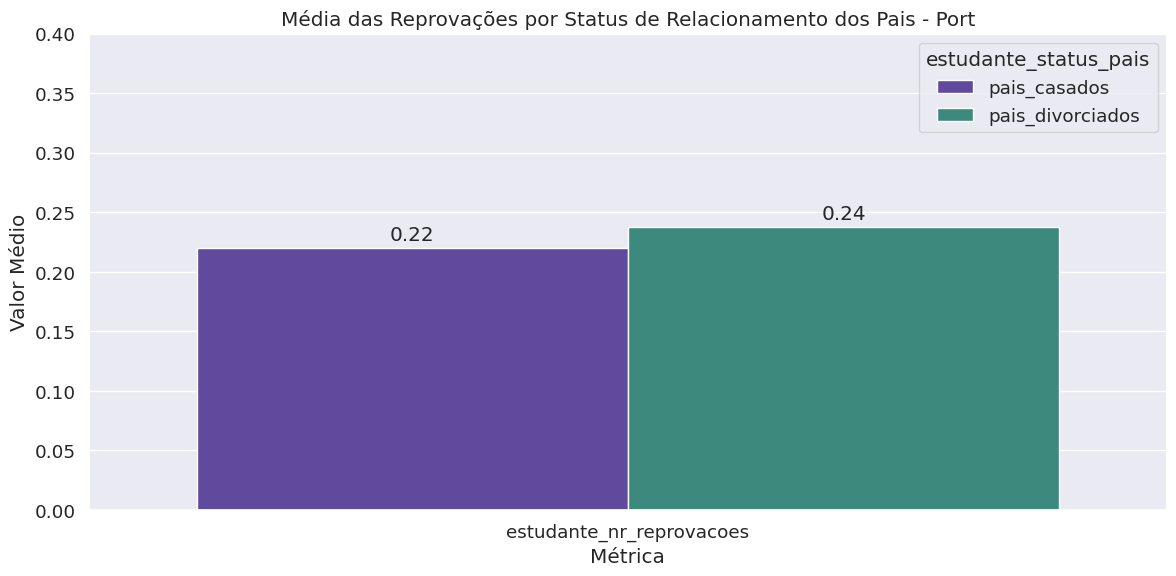

In [ ]:
# Agrupamento
internet_means = df_port_renomeado.groupby('estudante_status_pais')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derretendo
internet_means_melted = internet_means.melt(
    'estudante_status_pais',
    var_name='Metric',
    value_name='Mean Value'
)

# Cores personalizadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Metric',
    y='Mean Value',
    hue='estudante_status_pais',
    data=internet_means_melted,
    palette=cores
)

plt.title('Média das Reprovações por Status de Relacionamento dos Pais - Port')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.4)

# Rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

### O acesso à internet influencia na media das notas dos alunos ou na quantidade de reprovações?

#### Estudantes com acesso a internet tiveram uma média maior

Os dados mostram uma diferença interessante nas notas médias dos alunos quando consideramos o acesso à internet em casa.

**Estudantes com acesso à internet** apresentaram uma **média de 11,5 pontos.**

Já os que **não têm acesso à internet** ficaram com uma **média de 10,5 pontos.**

Essa diferença de 1 ponto pode parecer pequena, mas pode indicar que o acesso à internet está ajudando esses alunos a terem mais recursos de estudo, facilidade para tirar dúvidas, acesso a conteúdos extras e até ferramentas digitais de apoio à aprendizagem.

Ou seja, o acesso à internet pode ser um fator que favorece o desempenho escolar, reforçando a importância da inclusão digital como parte da educação.

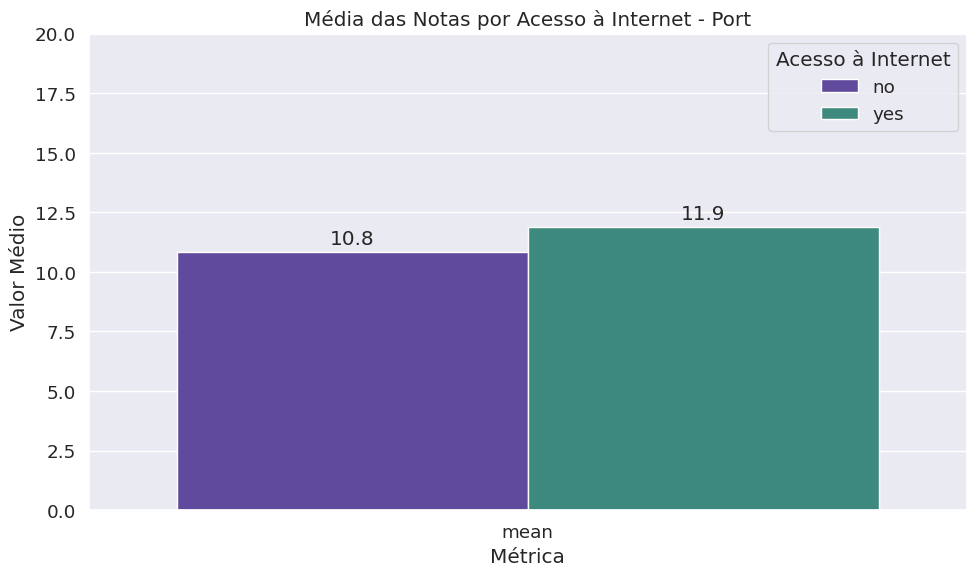

In [ ]:
# Cálculo da média das notas
df_port_renomeado['media_n1_n2_n3'] = (
    df_port_renomeado['nota1'] +
    df_port_renomeado['nota2'] +
    df_port_renomeado['nota3']
) / 3

# Agrupamento por acesso à internet
df_estudante_acesso_internet = df_port_renomeado.groupby('estudante_acesso_internet')['media_n1_n2_n3'].agg(['mean'])

# Derretendo para formato longo
df_estudante_acesso_internet_melted = df_estudante_acesso_internet.reset_index().melt(
    id_vars='estudante_acesso_internet',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Cores personalizadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_acesso_internet_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_acesso_internet',
    palette=cores
)

# Adiciona rótulos às barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Título e eixos
plt.title('Média das Notas por Acesso à Internet - Port')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Acesso à Internet', loc='upper right')

plt.tight_layout()
plt.show()

#### Média de Reprovações por Acesso a Internet

Ao analisarmos a média de reprovações entre os estudantes, observamos uma diferença que pode estar relacionada ao acesso à internet:

Alunos com acesso à internet apresentam uma média de 0,2 reprovações.

Já os que não têm acesso à internet possuem uma média de 0,4 reprovações.

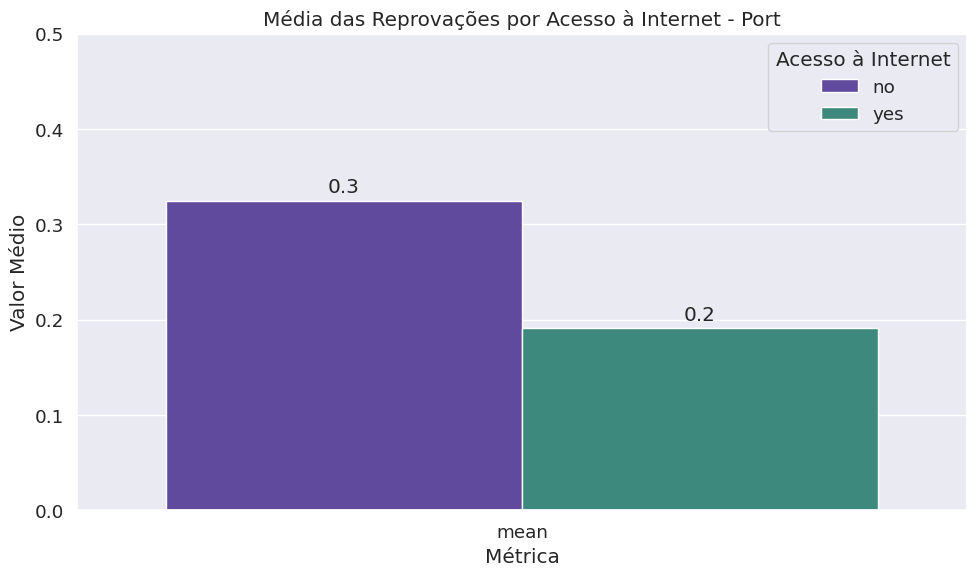

In [ ]:
# Calcula a média das notas
df_port_renomeado['media_n1_n2_n3'] = (
    df_port_renomeado['nota1'] +
    df_port_renomeado['nota2'] +
    df_port_renomeado['nota3']
) / 3

# Agrupamento por acesso à internet
df_estudante_acesso_internet = df_port_renomeado.groupby('estudante_acesso_internet')['estudante_nr_reprovacoes'].agg(['mean'])

# Derretendo para formato longo
df_estudante_acesso_internet_melted = df_estudante_acesso_internet.reset_index().melt(
    id_vars='estudante_acesso_internet',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Cores personalizadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_acesso_internet_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_acesso_internet',
    palette=cores
)

# Adiciona rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Títulos e eixos
plt.title('Média das Reprovações por Acesso à Internet - Port')
plt.ylim(0, 0.5)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título personalizado
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Acesso à Internet', loc='upper right')

plt.tight_layout()
plt.show()

### O tamanho da família influencia na media das notas dos alunos e no número de reprovações?



Ao observarmos a média das notas dos alunos com base no tamanho da família, percebemos uma diferença interessante:

**Estudantes de famílias com até 3 pessoas tiveram uma média de 11,6 pontos.**

**Já os alunos de famílias com mais de 3 pessoas apresentaram uma média de 11,1 pontos.**

Isso pode indicar que alunos de famílias menores talvez tenham mais recursos individuais ou menos distrações em casa, o que pode facilitar o foco nos estudos.

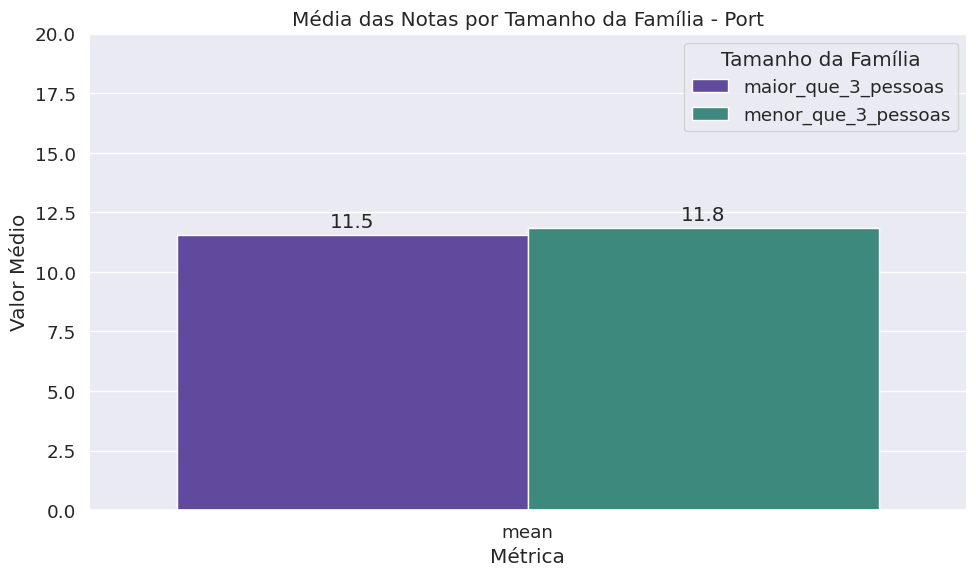

In [ ]:
# Calcula a média das notas
df_port_renomeado['media_n1_n2_n3'] = (
    df_port_renomeado['nota1'] +
    df_port_renomeado['nota2'] +
    df_port_renomeado['nota3']
) / 3

# Agrupamento por tamanho da família
df_estudante_acesso_internet = df_port_renomeado.groupby('estudante_tamanho_familia')['media_n1_n2_n3'].agg(['mean'])

# Derretendo para formato longo
df_estudante_tamanho_familia_melted = df_estudante_acesso_internet.reset_index().melt(
    id_vars='estudante_tamanho_familia',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Cores personalizadas
cores = ['#593cab', '#309687']  # Adicione mais cores aqui se houver mais categorias

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_tamanho_familia_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_tamanho_familia',
    palette=cores
)

# Adiciona rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Títulos e eixos
plt.title('Média das Notas por Tamanho da Família - Port')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título personalizado
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Tamanho da Família', loc='upper right')

plt.tight_layout()
plt.show()

### Análise da média entre Tamanho da Família e Reprovação Escolar
Este gráfico mostra a média de reprovações escolares com base no tamanho da família dos estudantes. Veja o que foi observado:

**Alunos que vivem em famílias com mais de 3 pessoas apresentaram uma média de 0,25 reprovações.**

**Já aqueles que vivem em famílias com até 3 pessoas tiveram uma média um pouco menor, de 0,16 reprovações.**

A diferença é pequena, mas pode sugerir que em famílias maiores, o estudante talvez tenha menos atenção individualizada ou mais responsabilidades em casa, o que pode interferir no seu desempenho escolar.

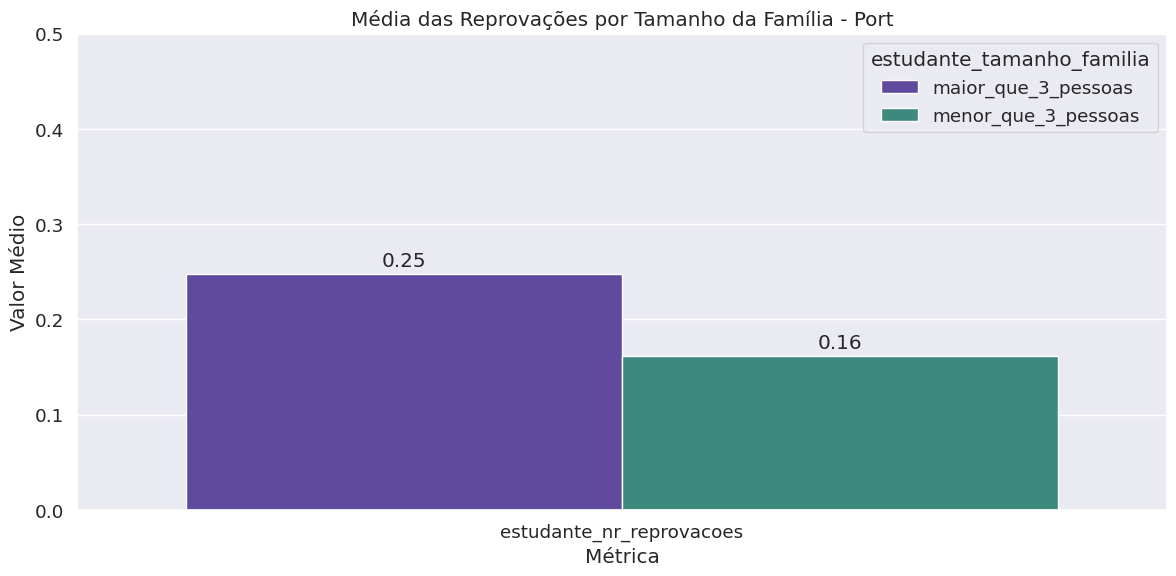

In [ ]:
# Calcula os valores médios para plotagem
famsize_means = df_port_renomeado.groupby('estudante_tamanho_familia')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derrete o DataFrame para facilitar a plotagem com seaborn
famsize_means_melted = famsize_means.melt(
    id_vars='estudante_tamanho_familia',
    var_name='Metric',
    value_name='Mean Value'
)

# Cores personalizadas
cores = ['#593cab', '#309687']  # Tamanho <= 3 e > 3, por exemplo

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Metric',
    y='Mean Value',
    hue='estudante_tamanho_familia',
    data=famsize_means_melted,
    palette=cores
)

# Personalização
plt.title('Média das Reprovações por Tamanho da Família - Port')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.5)

# Adicionar rótulos às barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

## Existe diferença no desempenho acadêmico (notas) e no histórico de reprovações entre alunos do sexo masculino e feminino?



#### Média geral das notas separadas por sexo dos estudantes:

Alunos do sexo masculino apresentaram uma média de 11,2 pontos.

Já os alunos do sexo feminino obtiveram uma média uma media ligeiramnete maior, de 11,3 pontos.

Embora a diferença não seja muito grande, é possível observar que, nesta base de dados, os meninos tiveram desempenho um pouco melhor que as meninas em termos de notas médias.

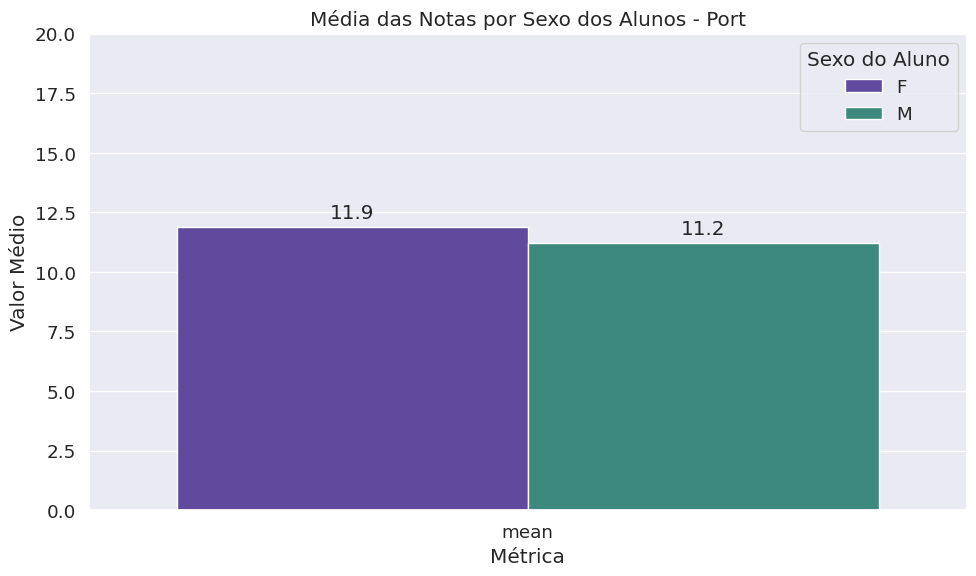

In [ ]:
# Calcula a média das notas
df_port_renomeado['media_n1_n2_n3'] = (
    df_port_renomeado['nota1'] +
    df_port_renomeado['nota2'] +
    df_port_renomeado['nota3']
) / 3

# Agrupamento por sexo
df_estudante_sexo = df_port_renomeado.groupby('estudante_sexo')['media_n1_n2_n3'].agg(['mean'])

# Derretendo para formato longo
df_estudante_sexo_melted = df_estudante_sexo.reset_index().melt(
    id_vars='estudante_sexo',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Definir as cores desejadas
cores = ['#593cab', '#309687']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_sexo_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_sexo',
    palette=cores
)

# Adiciona os rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

# Títulos e rótulos
plt.title('Média das Notas por Sexo dos Alunos - Port')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título personalizado
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Sexo do Aluno', loc='upper right')

plt.tight_layout()
plt.show()


#### Média do número de reprovações separadas por sexo:

**Alunas do sexo feminino têm, em média, 0,23 reprovações.**

**Alunos do sexo masculino apresentam uma média de 0,31 reprovações.**

Isso indica que, em geral, os meninos tendem a reprovar mais do que as meninas nesta base de dados.

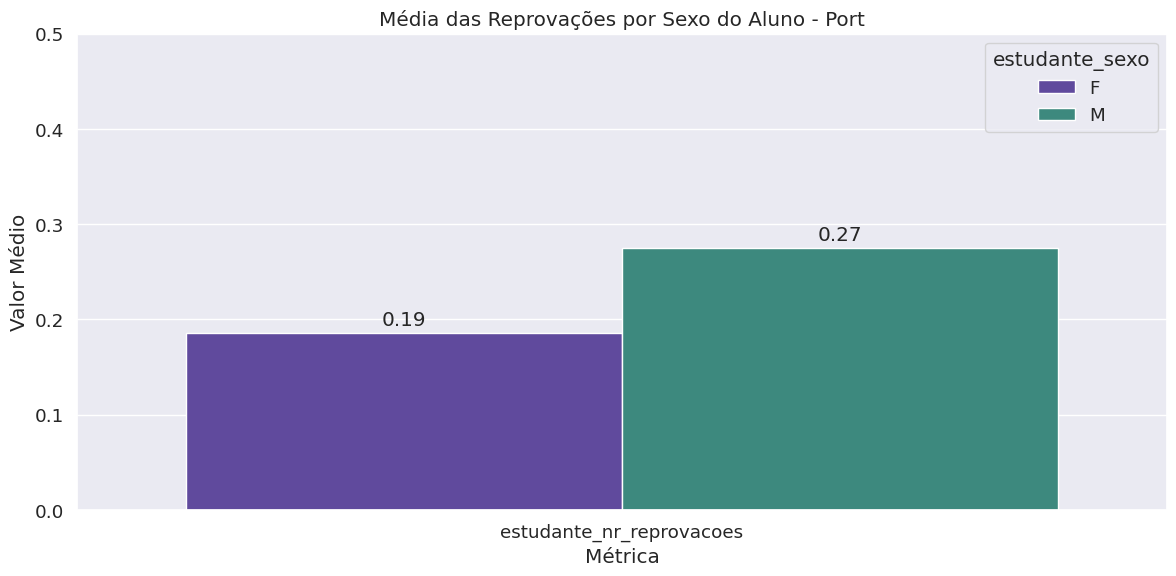

In [ ]:
# Calcula os valores médios para plotagem
famsize_means = df_port_renomeado.groupby('estudante_sexo')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derrete o DataFrame para facilitar a plotagem com seaborn
famsize_means_melted = famsize_means.melt(
    id_vars='estudante_sexo',
    var_name='Metric',
    value_name='Mean Value'
)

# Define as cores desejadas
cores = ['#593cab', '#309687']  # roxo e verde azulado

# Criação do gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Metric',
    y='Mean Value',
    hue='estudante_sexo',
    data=famsize_means_melted,
    palette=cores
)

# Personalização do gráfico
plt.title('Média das Reprovações por Sexo do Aluno - Port')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.5)

# Adiciona os rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


### Estar em um relacionamento amoroso afeta negativamente as notas ou aumenta o número de reprovações dos alunos?


### Médias das notas que têm um relacionamento ('yes') e aqueles que não têm ('no')

Os resultados mostram que os alunos sem relacionamento amoroso ("no") obtiveram **uma nota média de 11.48**.

Enquanto os alunos com **relacionamento amoroso ("yes")** obtiveram uma **nota média de 10.88**.

Isso sugere que, neste conjunto de dados, os alunos sem relacionamento amoroso tiveram um desempenho ligeiramente superior nas notas em comparação com os alunos que estão em um relacionamento.



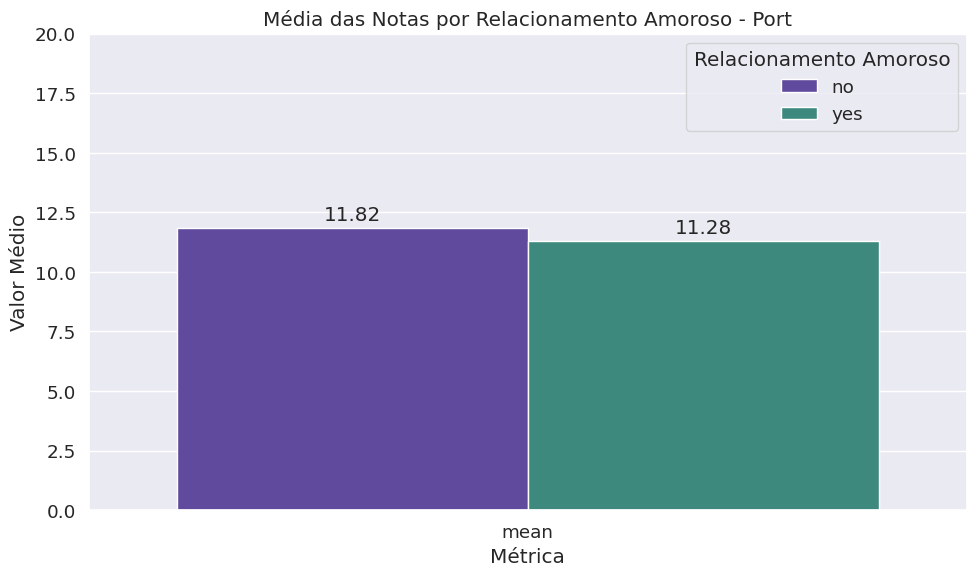

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cálculo da média das notas
df_port_renomeado['media_n1_n2_n3'] = (
    df_port_renomeado['nota1'] +
    df_port_renomeado['nota2'] +
    df_port_renomeado['nota3']
) / 3

# Agrupar por relacionamento e calcular a média
df_estudante_relacionamento = df_port_renomeado.groupby('estudante_relacionamento')['media_n1_n2_n3'].agg(['mean'])

# Cores personalizadas
cores = ['#593cab', '#309687']

# Derreter para formato longo
df_estudante_relacionamento_melted = df_estudante_relacionamento.reset_index().melt(
    id_vars='estudante_relacionamento',
    var_name='Métrica',
    value_name='Valor Médio'
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_estudante_relacionamento_melted,
    x='Métrica',
    y='Valor Médio',
    hue='estudante_relacionamento',
    palette=cores  # <- aqui você usa as suas cores
)

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalização do gráfico
plt.title('Média das Notas por Relacionamento Amoroso - Port')
plt.ylim(0, 20)
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')

# Legenda com título
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Relacionamento Amoroso', loc='upper right')

plt.tight_layout()
plt.show()


### Média de reprovações entre os alunos que têm um relacionamento ('yes') e aqueles que não têm ('no')

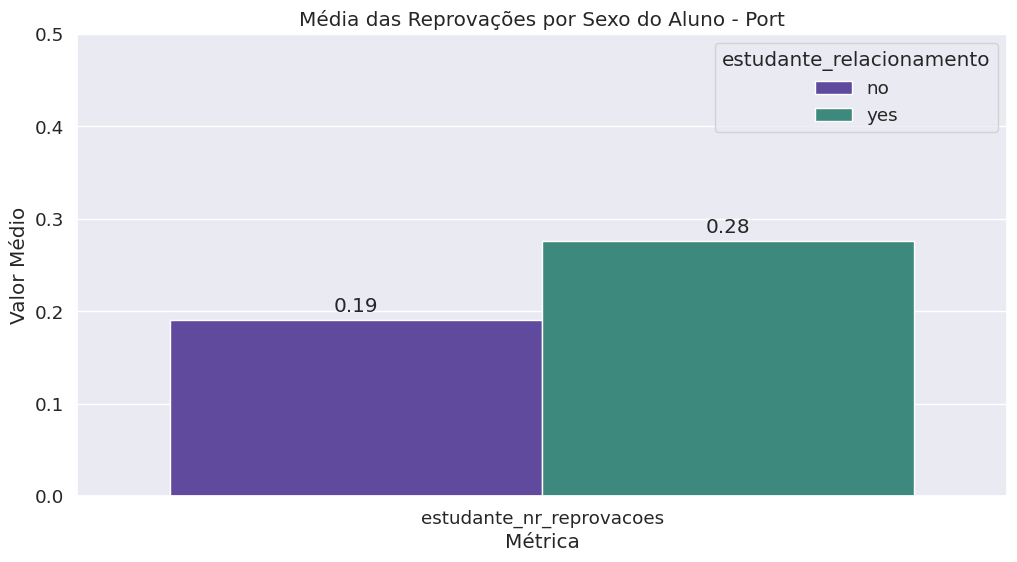

In [ ]:
# Calcula os valores médios para plotagem
famsize_means = df_port_renomeado.groupby('estudante_relacionamento')[['estudante_nr_reprovacoes']].mean().reset_index()

# Derrete o DataFrame para facilitar a plotagem com seaborn
famsize_means_melted = famsize_means.melt('estudante_relacionamento', var_name='Metric', value_name='Mean Value')

# Define as cores personalizadas
cores = ['#593cab', '#309687']

# Cria o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Metric',
    y='Mean Value',
    hue='estudante_relacionamento',
    data=famsize_means_melted,
    palette=cores  # <- cores personalizadas aqui
)

plt.title('Média das Reprovações por Sexo do Aluno - Port')
plt.xlabel('Métrica')
plt.ylabel('Valor Médio')
plt.ylim(0, 0.5)

# Adicionar rótulos às barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()

O gráfico mostra a média do número de reprovações separadas entre estudantes que estão em um relacionamento amoroso ("yes") e os que não estão ("no"):

**Estudantes que não estão em relacionamento têm uma média de aproximadamente 0,23 reprovações.**

**Estudantes que estão em relacionamento apresentam uma média maior, de aproximadamente 0,33 reprovações.**

Alunod com um relacionamento tem mais chance de reprovação do que alunos que não estão em um relacionamento.

## Correlacionando Variáveis

### **Visualizando a Relação entre Faltas e Notas:**

Para visualizar a relação entre o número de faltas ('absences') e as notas (1, 2, 3), vamos criar gráficos de dispersão. Esses gráficos nos ajudarão a identificar visualmente se há alguma tendência, mesmo que não seja uma correlação linear forte.

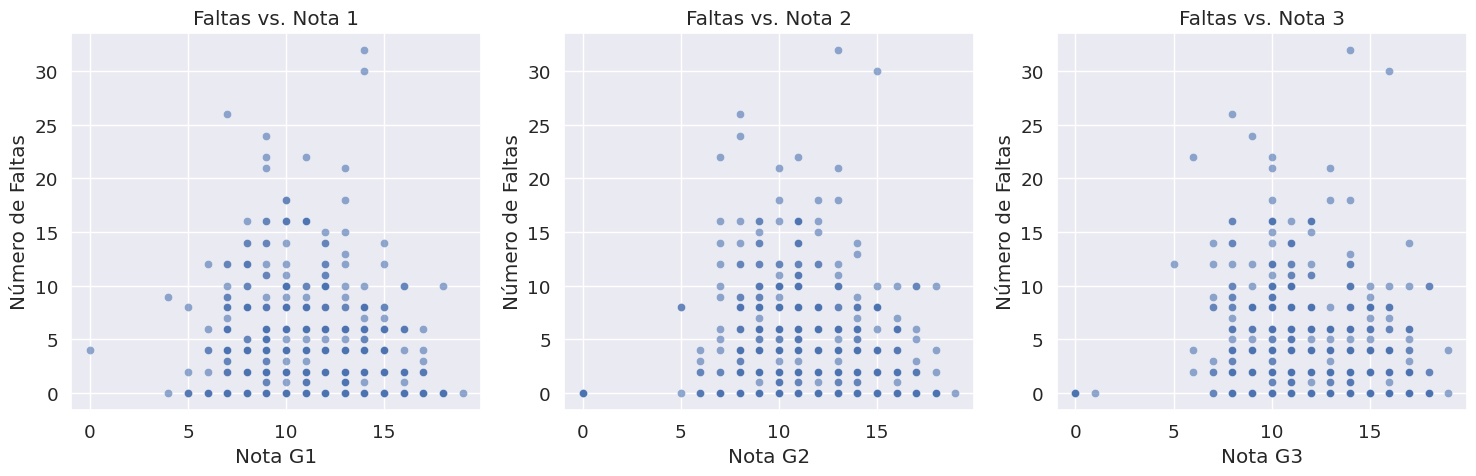

In [ ]:
plt.figure(figsize=(15, 5))

# Gráfico de dispersão para Faltas vs. G1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_port_renomeado, x='nota1', y='estudante_nr_faltas', alpha=0.6)
plt.title('Faltas vs. Nota 1')
plt.ylabel('Número de Faltas')
plt.xlabel('Nota G1')
plt.grid(True)

# Gráfico de dispersão para Faltas vs. G2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_port_renomeado, x='nota2', y='estudante_nr_faltas', alpha=0.6)
plt.title('Faltas vs. Nota 2')
plt.ylabel('Número de Faltas')
plt.xlabel('Nota G2')
plt.grid(True)


# Gráfico de dispersão para Faltas vs. G3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_port_renomeado, x='nota3', y='estudante_nr_faltas', alpha=0.6)
plt.title('Faltas vs. Nota 3')
plt.ylabel('Número de Faltas')
plt.xlabel('Nota G3')
plt.grid(True)


plt.tight_layout()
plt.show()

**Observações dos Gráficos de Dispersão (Faltas vs. Notas):**

Ao analisar os gráficos de dispersão que comparam o número de faltas ('absences') com as notas (1, 2 e 3), podemos observar o seguinte de forma resumida:

*   **Dispersão dos Pontos:** Os pontos nos gráficos estão bastante dispersos, sem uma linha clara ou curva indicando uma relação forte e consistente entre o número de faltas e as notas.
*   **Concentração de Dados:** A maioria dos alunos tem um número relativamente baixo de faltas (concentrados na parte esquerda dos gráficos). Dentro dessa faixa de poucas faltas, as notas variam bastante.
*   **Faltas Elevadas e Notas:** Embora haja alguns alunos com um número maior de faltas, não vemos uma tendência clara de que as notas diminuam drasticamente à medida que o número de faltas aumenta. Há casos de alunos com muitas faltas e notas variadas, incluindo algumas notas razoáveis.

**Em Resumo:**

Visualmente, os gráficos de dispersão reforçam a conclusão da análise de correlação: não há uma relação linear forte e óbvia entre o número de faltas e as notas dos alunos neste conjunto de dados. Isso sugere que, embora as faltas possam ter algum impacto individual, elas não são o único ou principal fator determinante das notas, e outros elementos podem influenciar o desempenho acadêmico.

### **Visualizando a Relação entre Tempo de Viagem e Notas:**

Para visualizar a relação entre o tempo de viagem para a escola('tempo_viagem_escola') e as notas (1, 2, 3), vamos criar gráficos de dispersão. Esses gráficos nos ajudarão a identificar visualmente se há alguma tendência, mesmo que não seja uma correlação linear forte.

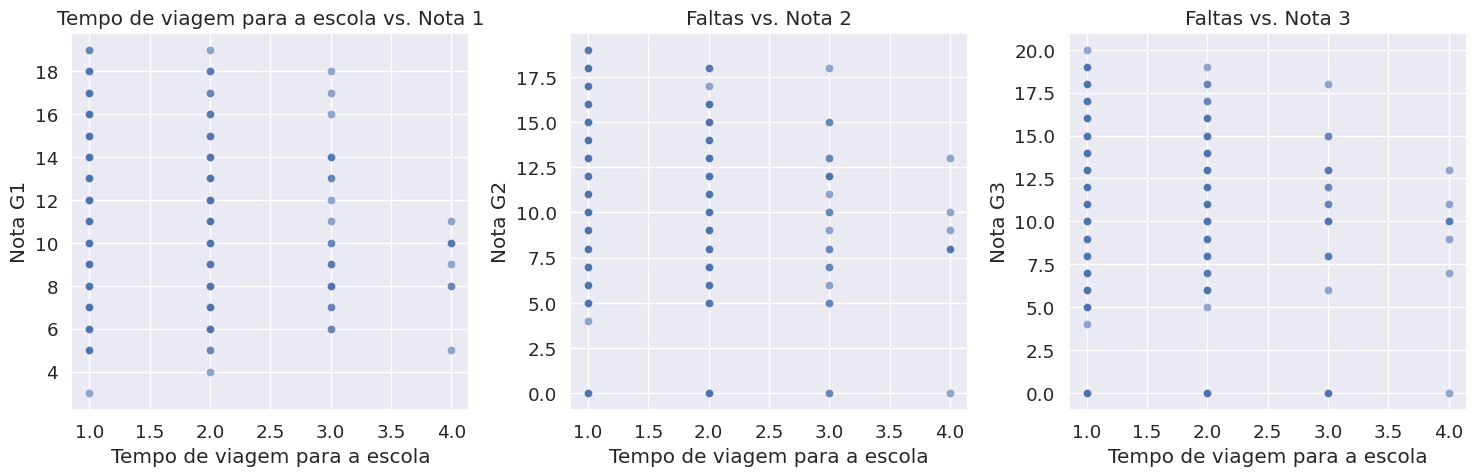

In [ ]:
plt.figure(figsize=(15, 5))

# Gráfico de dispersão para Faltas vs. nota1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_math_renomeado, x='tempo_viagem_escola', y='nota1', alpha=0.6)
plt.title('Tempo de viagem para a escola vs. Nota 1')
plt.xlabel('Tempo de viagem para a escola')
plt.ylabel('Nota G1')
plt.grid(True)

# Gráfico de dispersão para Faltas vs. nota2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_math_renomeado, x='tempo_viagem_escola', y='nota2', alpha=0.6)
plt.title('Faltas vs. Nota 2')
plt.xlabel('Tempo de viagem para a escola')
plt.ylabel('Nota G2')
plt.grid(True)


# Gráfico de dispersão para Faltas vs. nota3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_math_renomeado, x='tempo_viagem_escola', y='nota3', alpha=0.6)
plt.title('Faltas vs. Nota 3')
plt.xlabel('Tempo de viagem para a escola')
plt.ylabel('Nota G3')
plt.grid(True)


plt.tight_layout()
plt.show()

A maioria dos alunos mora perto da escola (viagens curtas – categorias 1 e 2). Embora não haja uma correlação forte, observa-se uma leve tendência de notas mais altas entre quem tem menor tempo de deslocamento. Já alunos com viagens mais longas (categoria 4) são menos frequentes e apresentam menor variação nas notas.

### **Visualizando a Relação entre Tempo de Estudo e Notas:**

Para visualizar a relação entre o tempo de viagem para a escola('tempo_viagem_escola') e as notas (G1, G2, G3), vamos criar gráficos de dispersão. Esses gráficos nos ajudarão a identificar visualmente se há alguma tendência, mesmo que não seja uma correlação linear forte.

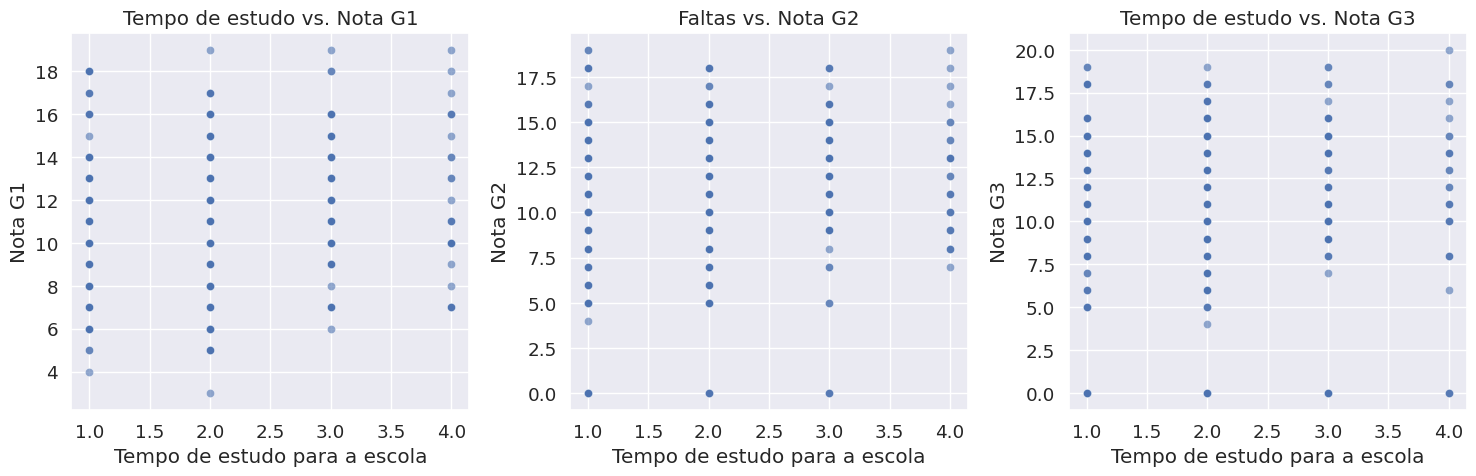

In [ ]:
plt.figure(figsize=(15, 5))

# Gráfico de dispersão para Faltas vs. G1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_math_renomeado, x='tempo_estudo', y='nota1', alpha=0.6)
plt.title('Tempo de estudo vs. Nota G1')
plt.xlabel('Tempo de estudo para a escola')
plt.ylabel('Nota G1')
plt.grid(True)

# Gráfico de dispersão para Faltas vs. G2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_math_renomeado, x='tempo_estudo', y='nota2', alpha=0.6)
plt.title('Faltas vs. Nota G2')
plt.xlabel('Tempo de estudo para a escola')
plt.ylabel('Nota G2')
plt.grid(True)


# Gráfico de dispersão para Faltas vs. G3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_math_renomeado, x='tempo_estudo', y='nota3', alpha=0.6)
plt.title('Tempo de estudo vs. Nota G3')
plt.xlabel('Tempo de estudo para a escola')
plt.ylabel('Nota G3')
plt.grid(True)


plt.tight_layout()
plt.show()

A análise dos gráficos mostra que estudantes que dedicam mais tempo aos estudos tendem a ter melhores desempenhos nas notas G1 e G2. Para a G1, é possível observar uma concentração de notas mais altas entre os alunos com tempo de estudo 3 e 4. O mesmo padrão se repete na G2, onde notas mais baixas aparecem com maior frequência entre os que estudam menos (nível 1). Isso indica que, de forma geral, um maior tempo de estudo está associado a melhores resultados escolares.


In [ ]:
df_port_renomeado.groupby('estudante_status_pais')[['estudante_nr_reprovacoes']].agg(['sum', 'size'])

estudante_nr_reprovacoes     
                                           sum size
estudante_status_pais                              
pais_casados                               125  569
pais_divorciados                            19   80